In [1]:
from IPython.display import HTML

HTML("""
<div style="
    background-color: #006D77;
    color: white;
    text-align: center;
    padding: 15px;
    font-size: 28px;
    font-weight: bold;
    border-radius: 10px;
">
    Introduction
</div>
""")

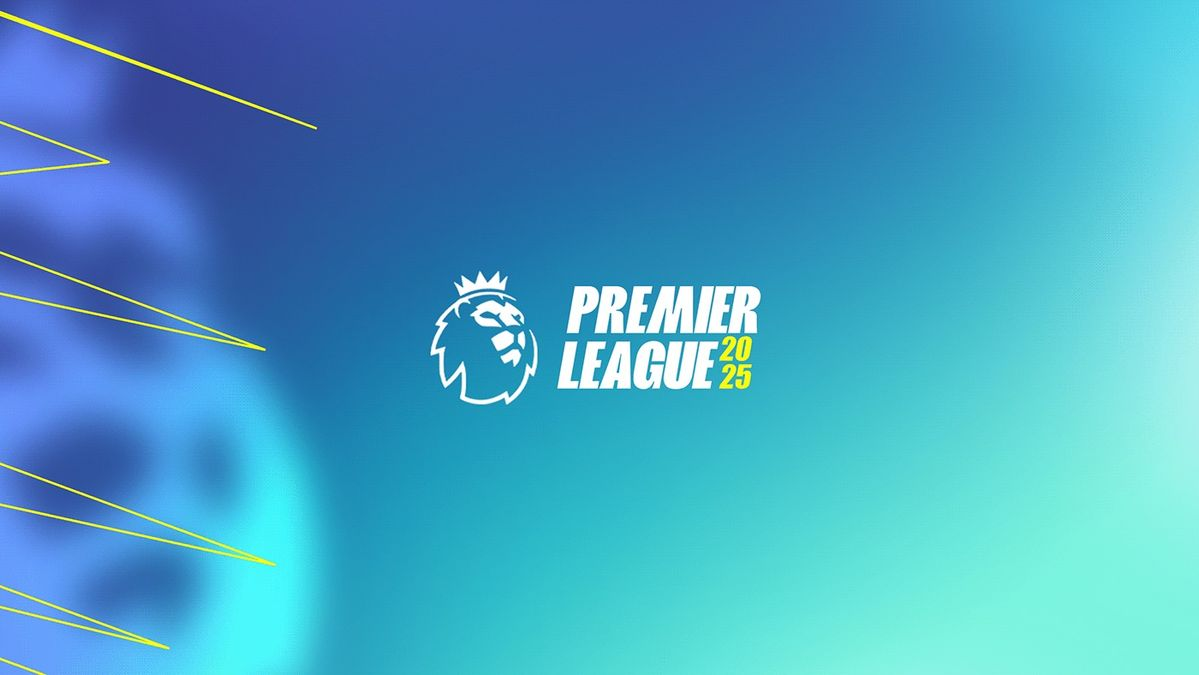

**The English Premier League (EPL) is widely regarded as one of the most competitive and popular football leagues in the world. Featuring 20 elite clubs, the league attracts top players, managers, and millions of fans globally. The Premier League is known for its high intensity, tactical diversity, and unpredictable outcomes, making it a rich source of data for performance analysis.**

**This analysis focuses on player-level statistics from the 2024/2025 Premier League season. By examining key performance metrics such as goals, assists, passing accuracy, defensive actions, and goalkeeping statistics, we aim to gain deeper insights into player contributions across different positions. Data visualization techniques are used to highlight trends, compare players, and support data-driven conclusions about performance and efficiency within the league.**

#**Load data, Display the First, last, Generate Descriptive Statistics**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [3]:
df = pd.read_csv('/content/epl_player_stats_24_25.csv')
df

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
0,Ben White,Arsenal,England,DEF,17,1198,0,2,9,12,...,10,2,0,0,0%,0,0,0,0,0.0
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,2,...,15,3,0,0,0%,0,0,0,0,0.0
2,David Raya,Arsenal,Spain,GKP,38,3420,0,0,0,0,...,1,3,0,86,72%,0,0,8,53,2.1
3,Declan Rice,Arsenal,England,MID,35,2833,4,7,48,18,...,21,5,1,0,0%,0,0,0,0,0.0
4,Ethan Nwaneri,Arsenal,England,MID,26,889,4,0,24,0,...,9,1,0,0,0%,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,Santiago Bueno,Wolverhampton Wanderers,Uruguay,DEF,29,1682,0,0,6,3,...,26,2,0,0,0%,0,0,0,0,0.0
558,Tom King,Wolverhampton Wanderers,Wales,GKP,1,1,0,0,0,0,...,0,0,0,0,0%,0,0,0,0,0.0
559,Tommy Doyle,Wolverhampton Wanderers,England,MID,24,475,0,1,9,0,...,5,1,0,0,0%,0,0,0,0,0.0
560,Toti Gomes,Wolverhampton Wanderers,Portugal,DEF,31,2615,0,0,7,8,...,24,7,0,0,0%,0,2,0,0,0.0


In [4]:
df.head()

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
0,Ben White,Arsenal,England,DEF,17,1198,0,2,9,12,...,10,2,0,0,0%,0,0,0,0,0.0
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,2,...,15,3,0,0,0%,0,0,0,0,0.0
2,David Raya,Arsenal,Spain,GKP,38,3420,0,0,0,0,...,1,3,0,86,72%,0,0,8,53,2.1
3,Declan Rice,Arsenal,England,MID,35,2833,4,7,48,18,...,21,5,1,0,0%,0,0,0,0,0.0
4,Ethan Nwaneri,Arsenal,England,MID,26,889,4,0,24,0,...,9,1,0,0,0%,0,0,0,0,0.0


In [5]:
df.tail()

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
557,Santiago Bueno,Wolverhampton Wanderers,Uruguay,DEF,29,1682,0,0,6,3,...,26,2,0,0,0%,0,0,0,0,0.0
558,Tom King,Wolverhampton Wanderers,Wales,GKP,1,1,0,0,0,0,...,0,0,0,0,0%,0,0,0,0,0.0
559,Tommy Doyle,Wolverhampton Wanderers,England,MID,24,475,0,1,9,0,...,5,1,0,0,0%,0,0,0,0,0.0
560,Toti Gomes,Wolverhampton Wanderers,Portugal,DEF,31,2615,0,0,7,8,...,24,7,0,0,0%,0,2,0,0,0.0
561,Yerson Mosquera,Wolverhampton Wanderers,Colombia,DEF,5,442,0,0,2,0,...,6,2,0,0,0%,0,1,0,0,0.0


In [6]:
df.isna().sum()

,0
Player Name,0
Club,0
Nationality,0
Position,0
Appearances,0
Minutes,0
Goals,0
Assists,0
Shots,0
Shots On Target,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player Name                562 non-null    object 
 1   Club                       562 non-null    object 
 2   Nationality                562 non-null    object 
 3   Position                   562 non-null    object 
 4   Appearances                562 non-null    int64  
 5   Minutes                    562 non-null    int64  
 6   Goals                      562 non-null    int64  
 7   Assists                    562 non-null    int64  
 8   Shots                      562 non-null    int64  
 9   Shots On Target            562 non-null    int64  
 10  Conversion %               562 non-null    object 
 11  Big Chances Missed         562 non-null    int64  
 12  Hit Woodwork               562 non-null    int64  
 13  Offsides                   562 non-null    int64  

In [8]:
df.describe()

,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Big Chances Missed,Hit Woodwork,Offsides,Touches,...,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,...,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,20.581851,1336.208185,1.713523,1.145907,17.526690,5.514235,2.135231,0.496441,2.250890,857.033808,...,0.058719,14.295374,2.756228,0.092527,4.161922,0.024911,0.145907,0.467972,1.304270,0.068505
std,12.136239,1055.099340,3.310674,2.197891,22.342341,9.407054,3.732051,0.986986,4.085456,729.009027,...,0.277056,15.040111,2.750985,0.307913,18.616319,0.187160,0.473986,2.832182,6.230133,0.635313
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.200000
25%,10.000000,336.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,199.250000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,1156.000000,0.000000,0.000000,10.000000,1.000000,1.000000,0.000000,1.000000,700.500000,...,0.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,2229.250000,2.000000,2.000000,25.000000,7.000000,3.000000,1.000000,3.000000,1356.750000,...,0.000000,22.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38.000000,3420.000000,29.000000,18.000000,130.000000,61.000000,27.000000,6.000000,28.000000,3347.000000,...,3.000000,73.000000,12.000000,2.000000,153.000000,2.000000,3.000000,28.000000,56.000000,6.000000


In [9]:
df.duplicated().sum()

np.int64(0)

#**Descriptive Analysis**

##The most common nationality in the league

In [10]:
max_nationality = df['Nationality'].value_counts().idxmax()
max_nationality

'England'

##The player who scored the most goals

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df[df['Goals'] == df['Goals'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
324,Mohamed Salah,Liverpool,Egypt,MID,38,3377,29,18,130,22,7%,24,6,18,1864,769,691,90%,81,21,26%,274,232,85%,2,435,231,0,0,26,14,138,67,8,5,4,1,21,435,194,45%,51,11,22%,0,0,0,25,1,0,0,0%,0,0,0,0,0.0


##Most assists player

In [13]:
df[df['Assists'] == df['Assists'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
324,Mohamed Salah,Liverpool,Egypt,MID,38,3377,29,18,130,22,7%,24,6,18,1864,769,691,90%,81,21,26%,274,232,85%,2,435,231,0,0,26,14,138,67,8,5,4,1,21,435,194,45%,51,11,22%,0,0,0,25,1,0,0,0%,0,0,0,0,0.0


##The player who participated in the most matches

In [14]:
df[df['Appearances'] == df['Appearances'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
2,David Raya,Arsenal,Spain,GKP,38,3420,0,0,0,0,0%,0,0,0,1599,0,0,0%,0,0,0%,0,0,0%,0,0,0,0,0,0,0,0,0,13,29,0,0,0,0,0,0%,0,0,0%,34,36,0,1,3,0,86,72%,0,0,8,53,2.1
13,Leandro Trossard,Arsenal,Belgium,MID,38,2550,8,7,72,2,6%,9,1,6,1410,950,765,81%,68,14,21%,295,222,75%,3,216,135,0,2,2,11,113,52,5,14,25,8,31,167,89,53%,59,35,59%,0,0,0,27,2,1,0,0%,0,0,0,0,0.0
46,Ollie Watkins,Aston Villa,England,FWD,38,2610,16,8,84,17,14%,27,2,16,784,286,241,84%,13,4,31%,162,131,81%,2,144,83,2,0,12,4,37,50,4,14,6,1,10,116,53,46%,16,5,31%,0,0,0,29,2,0,0,0%,0,0,0,0,0.0
75,Milos Kerkez,Bournemouth,Hungary,DEF,38,3342,2,5,19,61,22%,0,1,3,2264,1155,853,74%,78,17,22%,695,471,68%,19,482,264,4,9,35,35,101,22,9,99,9,0,52,289,118,41%,23,9,39%,0,0,0,0,4,0,0,0%,0,1,0,0,0.0
82,Bryan Mbeumo,Brentford,Cameroon,MID,38,3415,20,7,85,23,9%,9,1,11,1915,598,504,84%,56,13,23%,391,325,83%,4,320,192,2,4,25,12,70,47,8,51,3,0,49,212,109,51%,30,10,33%,0,0,0,25,3,0,0,0%,0,0,0,0,0.0
91,Keane Lewis-Potter,Brentford,England,MID,38,3101,1,3,28,2,0%,4,1,4,1713,767,636,83%,38,10,26%,240,191,80%,1,179,91,0,0,4,2,74,20,7,66,32,12,49,143,79,55%,48,26,54%,0,0,0,18,7,0,0,0%,0,1,0,0,0.0
92,Kevin Schade,Brentford,Germany,MID,38,2301,0,2,55,0,0%,9,3,13,979,1038,886,85%,25,3,12%,363,284,78%,3,130,78,0,0,0,1,68,36,2,0,12,3,39,94,53,56%,38,22,58%,0,0,0,21,3,0,0,0%,0,0,0,0,0.0
99,Mikkel Damsgaard,Brentford,Denmark,MID,38,2926,2,10,35,5,11%,4,0,6,2034,1350,1086,80%,132,35,27%,476,345,73%,2,426,272,1,3,6,13,169,47,2,0,45,10,83,207,124,60%,77,28,36%,0,0,0,18,2,0,0,0%,0,0,0,0,0.0
100,Nathan Collins,Brentford,Ireland,DEF,38,3420,2,3,17,7,3%,4,0,6,2496,850,692,81%,53,12,23%,299,230,77%,1,263,156,0,2,12,8,110,8,8,220,31,10,40,246,151,61%,70,40,57%,0,0,0,29,5,0,0,0%,0,0,0,0,0.0
153,Moisés Caicedo,Chelsea,Ecuador,MID,38,3356,1,2,20,22,11%,0,1,0,2721,1213,979,81%,45,13,29%,550,413,75%,19,341,197,0,5,6,15,127,25,10,53,23,5,114,246,113,46%,96,41,43%,0,0,0,70,11,0,0,0%,0,0,0,0,0.0


##Players with the most minutes played

In [15]:
df[df['Minutes'] == df['Minutes'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
2,David Raya,Arsenal,Spain,GKP,38,3420,0,0,0,0,0%,0,0,0,1599,0,0,0%,0,0,0%,0,0,0%,0,0,0,0,0,0,0,0,0,13,29,0,0,0,0,0,0%,0,0,0%,34,36,0,1,3,0,86,72%,0,0,8,53,2.1
100,Nathan Collins,Brentford,Ireland,DEF,38,3420,2,3,17,7,3%,4,0,6,2496,850,692,81%,53,12,23%,299,230,77%,1,263,156,0,2,12,8,110,8,8,220,31,10,40,246,151,61%,70,40,57%,0,0,0,29,5,0,0,0%,0,0,0,0,0.0
176,Dean Henderson,Crystal Palace,England,GKP,38,3420,0,0,1,0,0%,0,0,0,1407,0,0,0%,0,0,0%,0,0,0%,0,0,0,0,0,0,0,0,0,11,40,0,0,2,0,0,0%,0,0,0%,51,53,0,0,3,0,104,67%,1,0,18,30,5.1
210,Jordan Pickford,Everton,England,GKP,38,3420,0,0,0,0,0%,0,1,0,1822,0,0,0%,0,0,0%,0,0,0%,0,0,0,0,0,0,0,0,0,12,52,0,0,1,0,0,0%,0,0,0%,44,50,0,0,7,0,122,74%,2,0,22,31,6.0
223,Bernd Leno,Fulham,Germany,GKP,38,3420,0,1,0,0,0%,0,0,0,1586,0,0,0%,0,0,0%,0,0,0%,0,0,0,0,0,0,0,0,0,5,32,0,0,2,0,0,0%,0,0,0%,54,49,0,0,5,0,110,67%,1,0,21,23,-2.7
424,Matz Sels,Nottingham Forest,Belgium,GKP,38,3420,0,0,0,0,0%,0,0,0,1209,0,0,0%,0,0,0%,0,0,0%,0,0,0,0,0,0,0,0,0,13,54,0,0,1,0,0,0%,0,0,0%,46,50,0,1,4,0,120,72%,0,0,28,19,4.3


##The most successful pass player

In [16]:
df[df['Successful Passes'] == df['Successful Passes'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
301,Victor Kristiansen,Leicester City,Denmark,DEF,30,2489,0,1,3,8,11%,1,0,3,1682,2923,2680,92%,1,0,0%,506,395,78%,1,587,325,0,0,1,2,115,13,1,66,56,16,87,87,54,62%,165,119,72%,0,0,1,19,1,0,0,0%,0,0,0,0,0.0


##The player who took the most shots on target

In [17]:
df[df['Shots On Target'] == df['Shots On Target'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
75,Milos Kerkez,Bournemouth,Hungary,DEF,38,3342,2,5,19,61,22%,0,1,3,2264,1155,853,74%,78,17,22%,695,471,68%,19,482,264,4,9,35,35,101,22,9,99,9,0,52,289,118,41%,23,9,39%,0,0,0,0,4,0,0,0%,0,1,0,0,0.0


##Players most caught offside

In [18]:
df[df['Offsides'] == df['Offsides'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
417,Chris Wood,Nottingham Forest,New Zealand,FWD,36,2976,20,3,68,2,7%,15,1,28,827,657,562,86%,26,8,31%,239,189,79%,8,119,55,0,0,2,1,62,28,1,28,7,5,6,55,22,40%,8,2,25%,0,0,0,25,1,0,0,0%,0,1,0,0,0.0


##The players who made the most successful crosses

In [19]:
df[df['Successful Crosses'] == df['Successful Crosses'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
54,Antoine Semenyo,Bournemouth,Ghana,MID,37,3209,0,5,125,2,0%,12,5,15,1849,1628,1318,81%,170,42,25%,539,394,73%,1,445,294,0,3,3,17,157,77,6,34,62,8,55,286,151,53%,78,52,67%,0,0,0,73,9,0,0,0%,0,0,0,0,0.0


##The player who lost the ball the most

In [20]:
df[df['Dispossessed'] == df['Dispossessed'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
525,Mohammed Kudus,West Ham United,Ghana,MID,32,2601,5,3,75,3,5%,7,6,18,1508,2153,1941,90%,10,4,40%,605,494,82%,12,488,214,0,0,5,8,229,93,2,8,49,10,38,345,200,58%,56,36,64%,0,0,0,39,2,1,0,0%,0,0,0,0,0.0


##The player who kept the most clean sheets

In [21]:
df[df['Clean Sheets'] == df['Clean Sheets'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
327,Virgil van Dijk,Liverpool,Netherlands,DEF,37,3330,3,0,27,1,7%,3,1,0,3347,972,764,79%,97,28,29%,327,229,70%,2,171,105,0,0,1,5,88,5,14,190,44,9,38,171,103,60%,87,49,56%,0,0,0,17,5,0,0,0%,0,0,0,0,0.0


##The player who made the most mistakes

In [22]:
df[df['Fouls'] == df['Fouls'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
54,Antoine Semenyo,Bournemouth,Ghana,MID,37,3209,0,5,125,2,0%,12,5,15,1849,1628,1318,81%,170,42,25%,539,394,73%,1,445,294,0,3,3,17,157,77,6,34,62,8,55,286,151,53%,78,52,67%,0,0,0,73,9,0,0,0%,0,0,0,0,0.0


##The most player blocked shots or dangerous passes

In [23]:
df[df['Blocks'] == df['Blocks'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
16,Myles Lewis-Skelly,Arsenal,England,DEF,23,1370,1,0,3,6,12%,0,0,0,964,1961,1693,86%,8,2,25%,288,170,59%,3,459,267,0,0,1,2,162,9,3,24,34,57,22,129,75,58%,189,119,63%,0,0,0,11,3,2,0,0%,0,0,0,0,0.0


##The player who received the most yellow cards

In [24]:
df[df['Yellow Cards'] == df['Yellow Cards'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
241,Sasa Lukic,Fulham,Serbia,MID,30,2355,0,2,18,21,2%,2,0,0,1546,763,666,87%,70,16,23%,485,411,85%,5,471,256,0,5,28,25,79,8,0,32,6,2,68,206,103,50%,3,1,33%,0,0,0,66,12,0,0,0%,0,0,0,0,0.0
267,Liam Delap,Ipswich Town,England,FWD,37,2612,0,2,68,6,12%,10,3,14,821,1314,1183,90%,9,3,33%,211,157,74%,5,349,224,0,1,2,2,81,60,0,28,32,8,11,94,53,56%,29,16,55%,0,0,0,72,12,0,0,0%,0,0,0,0,0.0
446,Flynn Downes,Southampton,England,MID,27,2154,1,0,10,5,14%,1,0,0,1414,1628,1477,91%,9,0,0%,352,281,80%,1,307,191,0,0,0,2,63,17,3,50,16,29,49,71,46,65%,93,55,59%,0,0,0,50,12,0,0,0%,0,0,0,0,0.0


##The player who received the most red cards

In [25]:
df[df['Red Cards'] == df['Red Cards'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
16,Myles Lewis-Skelly,Arsenal,England,DEF,23,1370,1,0,3,6,12%,0,0,0,964,1961,1693,86%,8,2,25%,288,170,59%,3,459,267,0,0,1,2,162,9,3,24,34,57,22,129,75,58%,189,119,63%,0,0,0,11,3,2,0,0%,0,0,0,0,0.0
367,Bruno Fernandes,Manchester United,Portugal,MID,36,3024,8,10,96,15,11%,10,3,2,2781,1758,1471,84%,18,6,33%,705,532,76%,22,589,254,1,2,9,15,188,43,9,30,29,10,84,426,224,53%,38,19,50%,0,0,0,32,3,2,0,0%,0,0,0,0,0.0
447,Jack Stephens,Southampton,England,DEF,19,1394,1,0,4,4,10%,0,1,1,1115,1095,948,87%,1,0,0%,174,121,70%,0,183,69,0,0,0,1,61,3,1,49,21,26,34,94,63,67%,126,85,68%,0,0,0,13,2,2,0,0%,0,1,0,0,0.0


##The player who scored the most goals on his own team

In [26]:
df[df['Own Goals'] == df['Own Goals'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
186,Marc Guéhi,Crystal Palace,England,DEF,34,3059,3,2,15,0,0%,2,0,1,2206,713,552,77%,11,3,27%,220,117,53%,0,200,103,0,0,0,1,71,18,11,156,14,7,61,100,52,52%,62,33,53%,0,0,3,24,7,1,0,0%,0,0,0,0,0.0


##The player who won the most ground duels

In [27]:
df[df['gDuels Won'] == df['gDuels Won'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
367,Bruno Fernandes,Manchester United,Portugal,MID,36,3024,8,10,96,15,11%,10,3,2,2781,1758,1471,84%,18,6,33%,705,532,76%,22,589,254,1,2,9,15,188,43,9,30,29,10,84,426,224,53%,38,19,50%,0,0,0,32,3,2,0,0%,0,0,0,0,0.0


##The player who won the most aerial duels

In [28]:
df[df['aDuels Won'] == df['aDuels Won'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
174,Daichi Kamada,Crystal Palace,Japan,MID,34,1553,0,0,20,7,4%,0,0,2,986,1994,1767,89%,3,0,0%,164,97,59%,0,429,163,0,0,0,0,103,20,2,14,27,24,47,104,52,50%,224,148,66%,0,0,0,28,4,1,0,0%,0,0,0,0,0.0


##The player with the most successful tackles

In [29]:
df[df['Tackles'] == df['Tackles'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
202,Idrissa Gueye,Everton,Senegal,MID,37,3067,0,3,27,0,0%,1,1,0,1930,713,661,93%,4,1,25%,82,67,82%,3,220,142,0,0,0,1,42,38,11,34,4,14,133,32,16,50%,14,8,57%,0,0,0,55,9,0,0,0%,0,0,0,0,0.0


##The goalkeeper who made the most saves

In [30]:
df[df['Saves'] == df['Saves'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
96,Mark Flekken,Brentford,Netherlands,GKP,37,3276,0,2,0,0,0%,0,0,0,1986,0,0,0%,0,0,0%,0,0,0%,0,0,0,0,0,0,0,0,0,7,46,0,0,4,0,0,0%,0,0,0%,55,53,0,0,1,0,153,74%,0,0,20,46,0.5


##The goalkeeper who saved the most penalty kicks

In [31]:
df[df['Penalties Saved'] == df['Penalties Saved'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
210,Jordan Pickford,Everton,England,GKP,38,3420,0,0,0,0,0%,0,1,0,1822,0,0,0%,0,0,0%,0,0,0%,0,0,0,0,0,0,0,0,0,12,52,0,0,1,0,0,0%,0,0,0%,44,50,0,0,7,0,122,74%,2,0,22,31,6.0
437,Aaron Ramsdale,Southampton,England,GKP,30,2700,0,0,0,0,0%,0,0,0,1421,0,0,0%,0,0,0%,0,0,0%,0,0,0,0,0,0,0,0,0,3,28,0,0,0,0,0,0%,0,0,0%,66,66,0,1,2,0,125,66%,2,0,0,25,0.1
544,José Sá,Wolverhampton Wanderers,Portugal,GKP,29,2609,0,0,0,0,0%,0,0,0,1085,0,0,0%,0,0,0%,0,0,0%,0,0,0,0,0,0,0,0,0,7,25,0,0,2,0,0,0%,0,0,0%,48,44,0,4,2,0,71,60%,2,0,0,32,-2.2


##The goalkeeper who blocked the most shots that were expected to be goals

In [32]:
df[df['Goals Prevented'] == df['Goals Prevented'].max()]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
210,Jordan Pickford,Everton,England,GKP,38,3420,0,0,0,0,0%,0,1,0,1822,0,0,0%,0,0,0%,0,0,0%,0,0,0,0,0,0,0,0,0,12,52,0,0,1,0,0,0%,0,0,0%,44,50,0,0,7,0,122,74%,2,0,22,31,6.0


#Questions

####•Which are the top 10 teams in terms of goal scoring?
####•Which are the top 5 teams in terms of clean sheet records?
####•Who are the top 10 goal scorers?
####•Who are the top 10 players with the most playing minutes?
####•Who are the top 10 assists?
####•Comparison between the number of shots and the number of goals scored by the top 10 players
####•Who are the top 10 players who miss the most chances?
####•Who are the top 10 players who made the most accurate crosses?
####•Who are the players that make the most through passes?
####•Who are the top 10 players with the most yellow cards?
####•Who are the top 5 players with the most red cards?
####•Who are the top 10 players with the most blocks?
####•Who are the top 10 players with the most ground tackles?
####•Who are the top 10 players with the most aerial duels?
####•Who are the top 10 players with the most interceptions of opponent passes?
####•Who are the top 10 players who have made the most ball clearances?
####•Who are the top 10 players in ball dispossession?
####•Who are the top 10 players with the most successful tackles?
####•Who are the top 5 goalkeepers in terms of saves?
####•Who are the top 5 goalkeepers in saving penalty kicks?
####•-Who are the top 5 goalkeepers who have cleared the ball off the goal line?
####•Who are the top 5 goalkeepers with the most clean sheets?

#EDA

##Which are the top 10 teams in terms of goal scoring?

In [33]:
top_10teams_goals = df.groupby('Club')['Goals'].sum().sort_values(ascending=False).head(10)
top_10teams_goals

,Goals
Club,
Liverpool,72
Manchester City,71
Arsenal,67
Newcastle United,66
Chelsea,63
Brighton & Hove Albion,63
Aston Villa,61
Nottingham Forest,57
Brentford,54


In [34]:
team_colors = {
    "Liverpool": "#C8102E",              # Red
    "Manchester City": "#6CABDD",        # Sky Blue
    "Arsenal": "#EF0107",                # Red
    "Newcastle United": "#241F20",       # Black
    "Chelsea": "#034694",                # Blue
    "Brighton & Hove Albion": "#0057B8", # Blue
    "Aston Villa": "#670E36",            # Claret
    "Nottingham Forest": "#DD0000",      # Red
    "Brentford": "#E30613",              # Red
    "Crystal Palace": "#1B458F"          # Blue
}

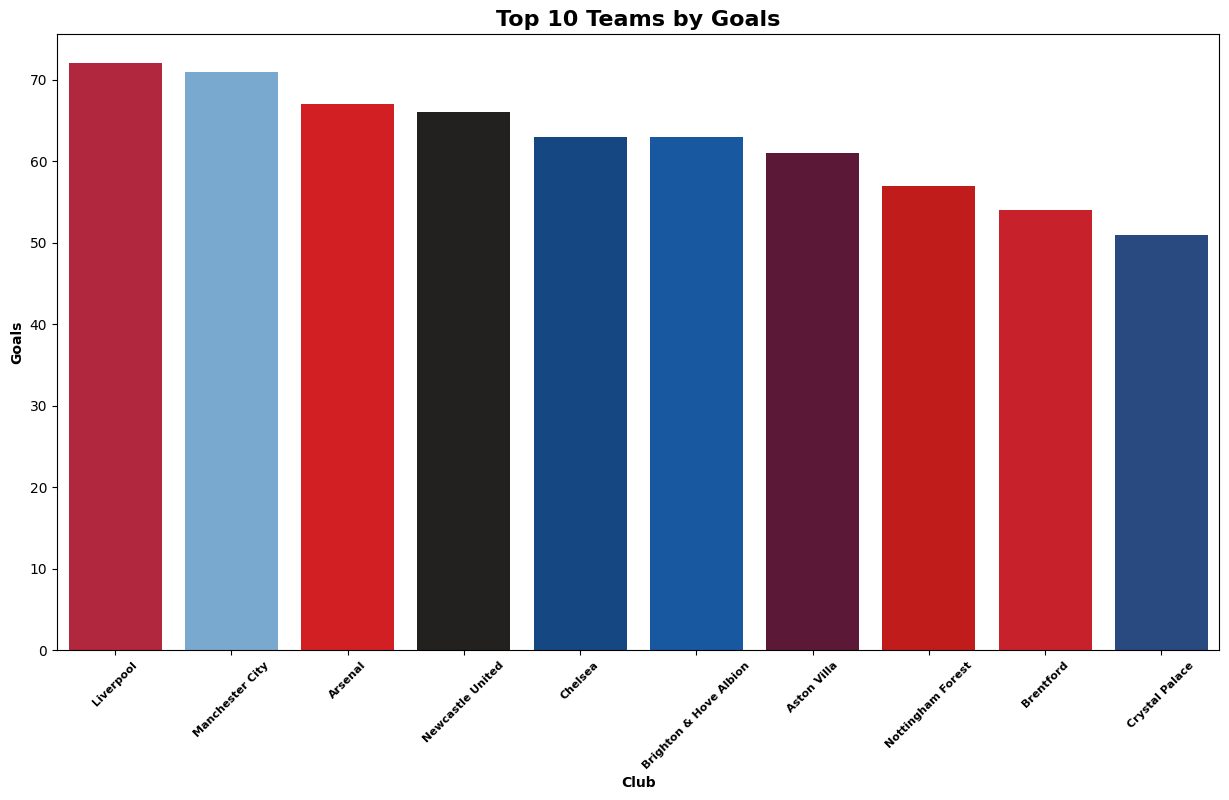

In [35]:
plt.figure(figsize=(15,8))
sns.barplot(data=top_10teams_goals.reset_index(),
            x='Club',
            y='Goals',
            hue='Club',
            palette=team_colors)

plt.title("Top 10 Teams by Goals", fontweight='bold' ,fontsize=16)
plt.xlabel("Club" , fontsize=10 ,fontweight='bold')
plt.ylabel("Goals" , fontsize=10 , fontweight='bold')
plt.xticks(fontweight = 'bold',fontsize=8,rotation=45)

plt.show()

##Which are the top 5 teams in terms of clean sheet records?

In [36]:
top_5teams_cleancheat = (
    df[df['Position'] == 'GKP']
    .groupby('Club')['Clean Sheets']
    .max()
    .sort_values(ascending=False)
    .head(5)
)
top_5teams_cleancheat

,Clean Sheets
Club,
Arsenal,13
Nottingham Forest,13
Everton,12
Crystal Palace,11
Manchester City,10


In [37]:
teams_colors = {
    "Arsenal": "#EF0107",
    "Nottingham Forest": "#DD0000",
    "Everton": "#003399",
    "Crystal Palace": "#1B458F",
    "Manchester City": "#6CABDD"
}

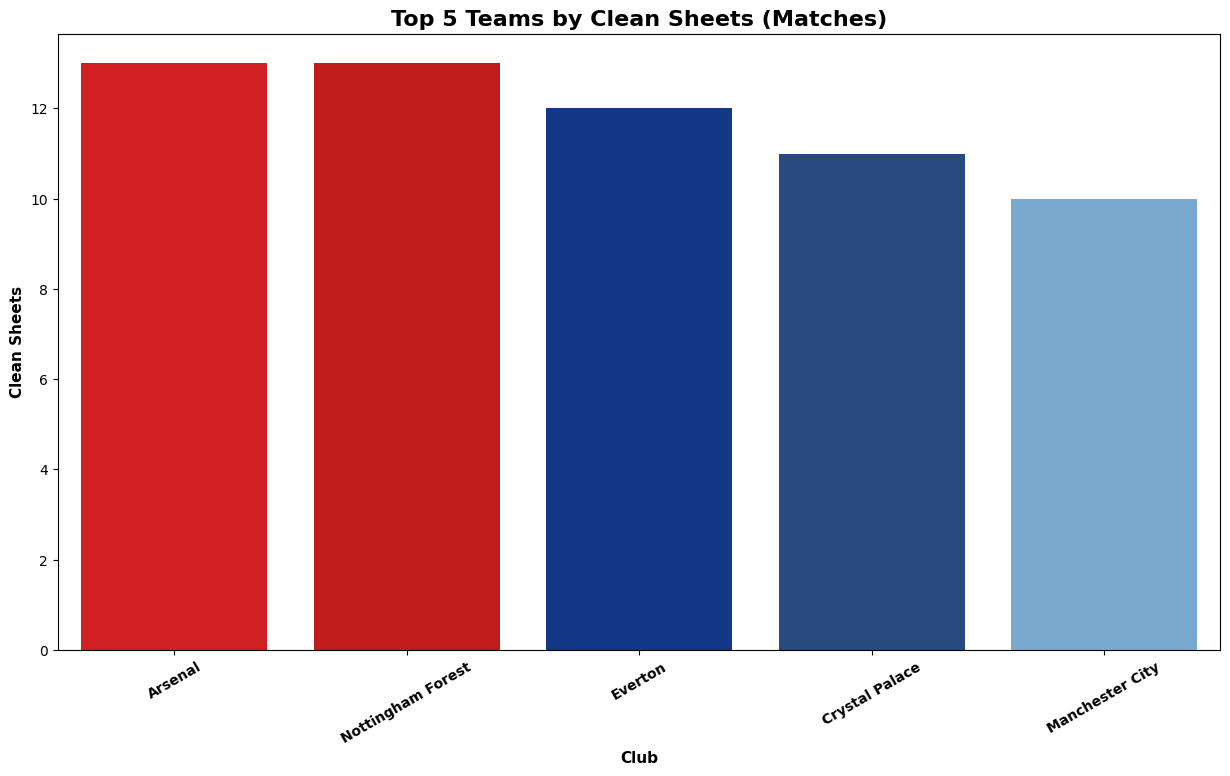

In [38]:
plt.figure(figsize=(15,8))

sns.barplot(
    data=top_5teams_cleancheat.reset_index(),
    x='Club',
    y='Clean Sheets',
    hue= 'Club',
    palette=teams_colors)

plt.title("Top 5 Teams by Clean Sheets (Matches)", fontsize=16, fontweight='bold')
plt.xlabel("Club", fontsize=11, fontweight='bold')
plt.ylabel("Clean Sheets", fontsize=11, fontweight='bold')
plt.xticks(rotation=30, fontweight='bold')

plt.show()

##Who are the top 10 goal scorers?

In [39]:
top_10_scorers = df.groupby('Player Name')['Goals'].sum().sort_values(ascending=False).head(10)
top_10_scorers

,Goals
Player Name,
Mohamed Salah,29
Alexander Isak,23
Erling Haaland,22
Chris Wood,20
Bryan Mbeumo,20
Yoane Wissa,19
Ollie Watkins,16
Cole Palmer,15
Matheus Cunha,15


In [40]:
player_colors = {
    "Mohamed Salah": "#C8102E",            # Liverpool
    "Alexander Isak": "#241F20",           # Newcastle
    "Erling Haaland": "#6CABDD",           # Man City
    "Chris Wood": "#8B0000",               # Nottingham Forest
    "Bryan Mbeumo": "#FF4C4C",             # Brentford
    "Yoane Wissa": "#FF4C4C",              # Brentford
    "Ollie Watkins": "#670E36",            # Aston Villa
    "Cole Palmer": "#034694",              # Chelsea
    "Matheus Cunha": "#F9A602",            # Wolves
    "Jean-Philippe Mateta": "#1B458F"      # Crystal Palace
}

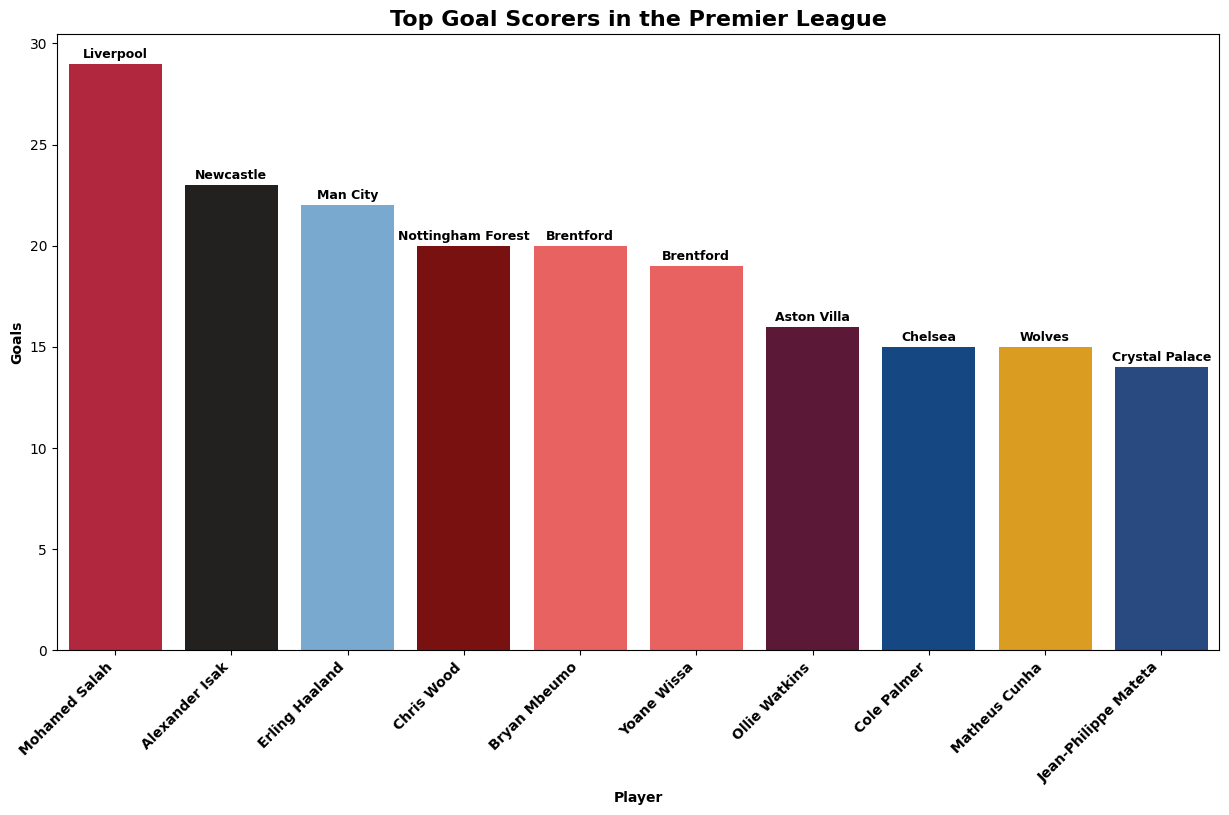

In [41]:
plt.figure(figsize=(15,8))
sns.barplot(data=top_10_scorers.reset_index(),
            x='Player Name',
            y='Goals',
            hue='Player Name',
            palette=player_colors)

clubs = [
    'Liverpool','Newcastle','Man City',
    'Nottingham Forest','Brentford', 'Brentford', 'Aston Villa',
    'Chelsea', 'Wolves' , 'Crystal Palace'
]

ax = plt.gca()
for i, club in enumerate(clubs):
    ax.text(
        i,
        top_10_scorers.iloc[i] + 0.3,
        club,
        ha="center",
        fontsize=9,
        fontweight="bold"
    )

plt.title("Top Goal Scorers in the Premier League", fontsize=16, fontweight="bold")
plt.xlabel("Player", fontweight="bold")
plt.ylabel("Goals", fontweight="bold")
plt.xticks(rotation=45, ha="right", fontweight="bold")

plt.show()

##Who are the top 10 players with the most playing minutes?

In [42]:
top_10_playersminutes = df.groupby('Player Name')['Minutes'].sum().sort_values(ascending=False).head(10)
top_10_playersminutes

,Minutes
Player Name,
Jordan Pickford,3420
David Raya,3420
Dean Henderson,3420
Bernd Leno,3420
Nathan Collins,3420
Matz Sels,3420
Bryan Mbeumo,3415
Mohamed Salah,3377
Moisés Caicedo,3356


In [43]:
player_colors_minutes = {
    "Jordan Pickford": "#003399",         # Everton
    "David Raya": "#EF0107",              # Arsenal
    "Dean Henderson": "#1B458F",          # Crystal Palace
    "Bernd Leno": "#000000",              # Fulham
    "Nathan Collins": "#E30613",          # Brentford
    "Matz Sels": "#8B0000",               # Nottingham Forest
    "Bryan Mbeumo": "#FF4C4C",            # Brentford
    "Mohamed Salah": "#C8102E",           # Liverpool
    "Moisés Caicedo": "#034694",          # Chelsea
    "Maximilian Kilman": "#7A263A"        # Westham
}

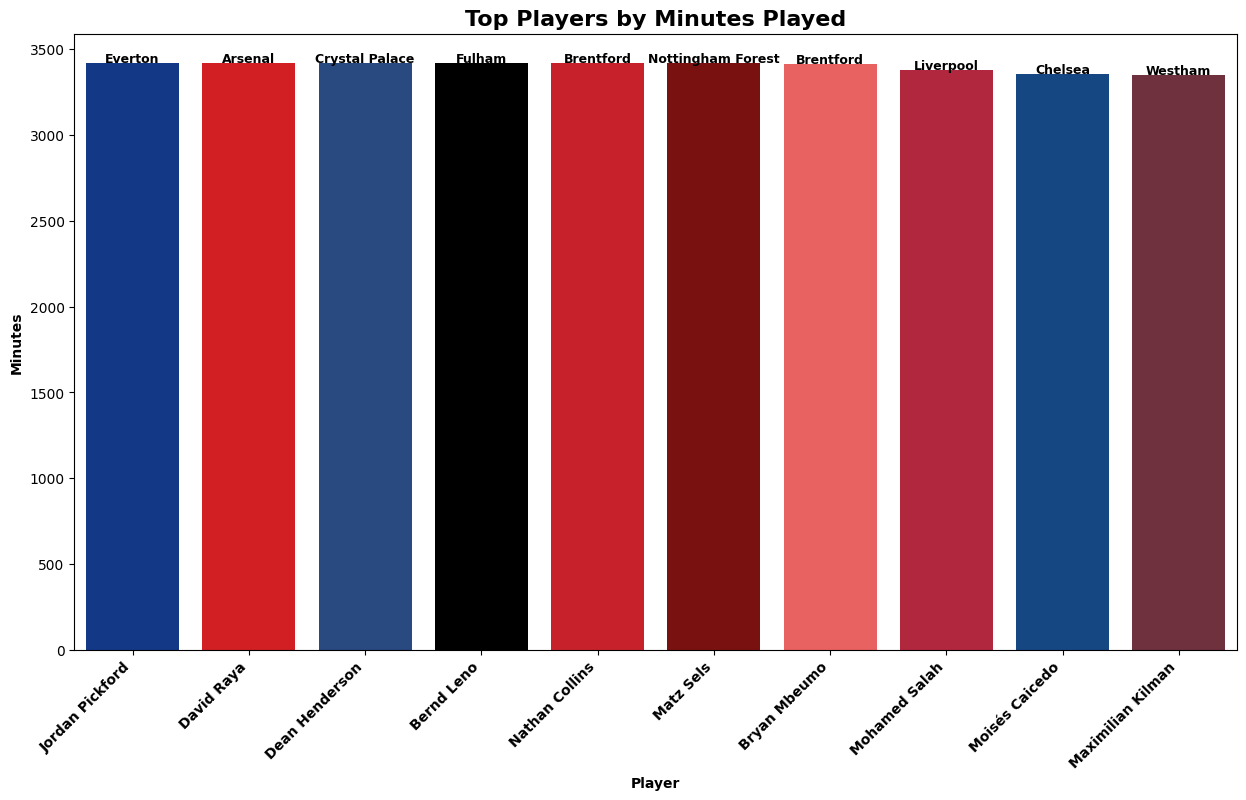

In [44]:
plt.figure(figsize=(15,8))

sns.barplot(
    data=top_10_playersminutes.reset_index(),
    x="Player Name",
    y="Minutes",
    hue='Player Name',
    palette=player_colors_minutes
)

clubs = [
    'Everton','Arsenal','Crystal Palace',
    'Fulham','Brentford', 'Nottingham Forest', 'Brentford',
    'Liverpool', 'Chelsea' , 'Westham'
]

ax = plt.gca()
for i, club in enumerate(clubs):
    ax.text(
        i,
        top_10_playersminutes.iloc[i] + 5,
        club,
        ha="center",
        fontsize=9,
        fontweight="bold"
    )

plt.title("Top Players by Minutes Played", fontsize=16, fontweight="bold")
plt.xlabel("Player", fontweight="bold")
plt.ylabel("Minutes", fontweight="bold")
plt.xticks(rotation=45, ha="right", fontweight="bold")

plt.show()

##Who are the top 10 assists?

In [45]:
top_10_Assists = df.groupby('Player Name')['Assists'].sum().sort_values(ascending=False).head(10)
top_10_Assists

,Assists
Player Name,
Mohamed Salah,18
Jacob Murphy,12
Anthony Elanga,11
Bukayo Saka,10
Morgan Rogers,10
Mikkel Damsgaard,10
Antonee Robinson,10
Bruno Fernandes,10
Son Heung-Min,9


In [46]:
player_colors_assists = {
    "Mohamed Salah": "#C8102E",        # Liverpool
    "Jacob Murphy": "#241F20",         # Newcastle
    "Anthony Elanga": "#DD0000",       # Nottingham Forest
    "Bukayo Saka": "#EF0107",          # Arsenal
    "Morgan Rogers": "#670E36",        # Aston Villa
    "Mikkel Damsgaard": "#E30613",     # Brentford
    "Antonee Robinson": "#000000",     # Fulham
    "Bruno Fernandes": "#DA291C",      # Man United
    "Son Heung-Min": "#4B5563",        # Tottenham
    "Eberechi Eze": "#1B458F"          # Crystal Palace
}

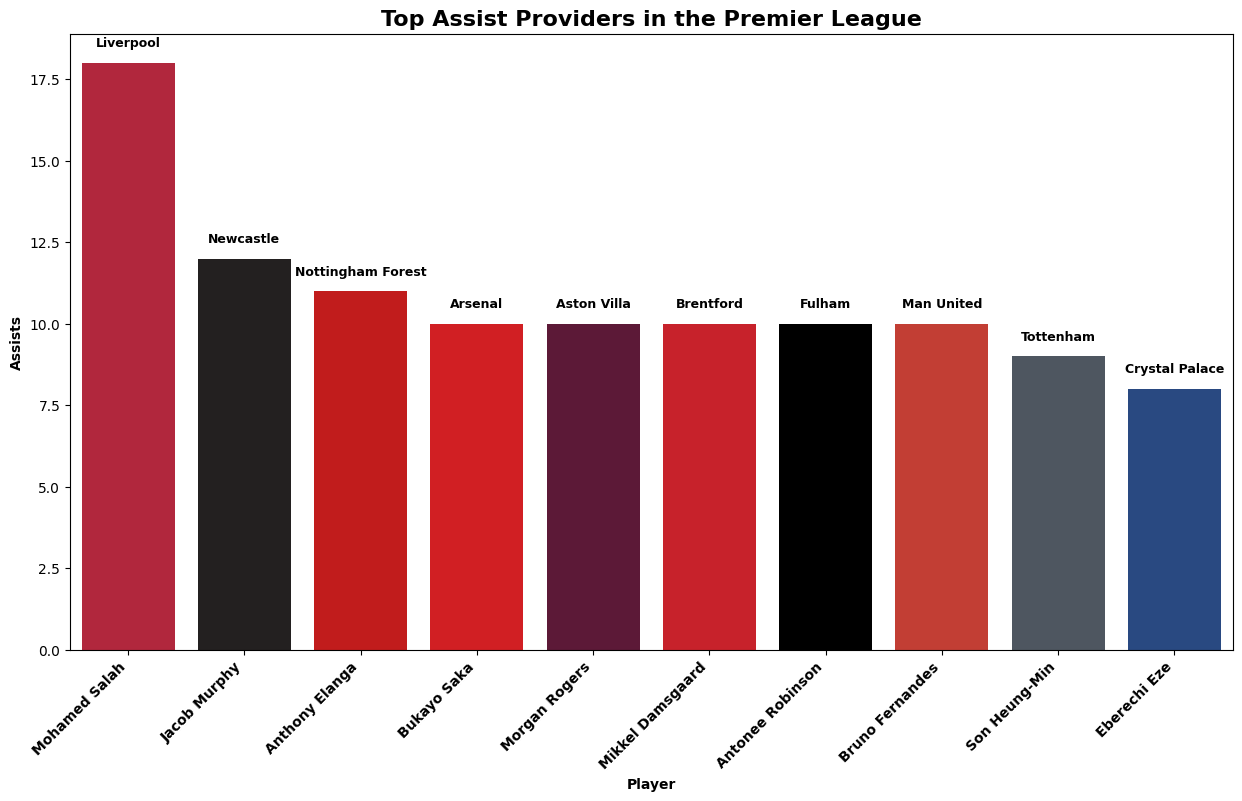

In [47]:
plt.figure(figsize=(15,8))

ax = sns.barplot(
    data=top_10_Assists.reset_index(),
    x="Player Name",
    y="Assists",
    hue='Player Name',
    palette=player_colors_assists
)

clubs = [
    'Liverpool','Newcastle','Nottingham Forest',
    'Arsenal','Aston Villa', 'Brentford', 'Fulham',
    'Man United', 'Tottenham' , 'Crystal Palace'
]

ax = plt.gca()
for i, club in enumerate(clubs):
    ax.text(
        i,
        top_10_Assists.iloc[i] + 0.5,
        club,
        ha="center",
        fontsize=9,
        fontweight="bold"
    )

plt.title("Top Assist Providers in the Premier League", fontsize=16, fontweight="bold")
plt.xlabel("Player", fontweight="bold")
plt.ylabel("Assists", fontweight="bold")
plt.xticks(rotation=45, ha="right", fontweight="bold")

plt.show()

##Comparison between the number of shots and the number of goals scored by the top 10 players

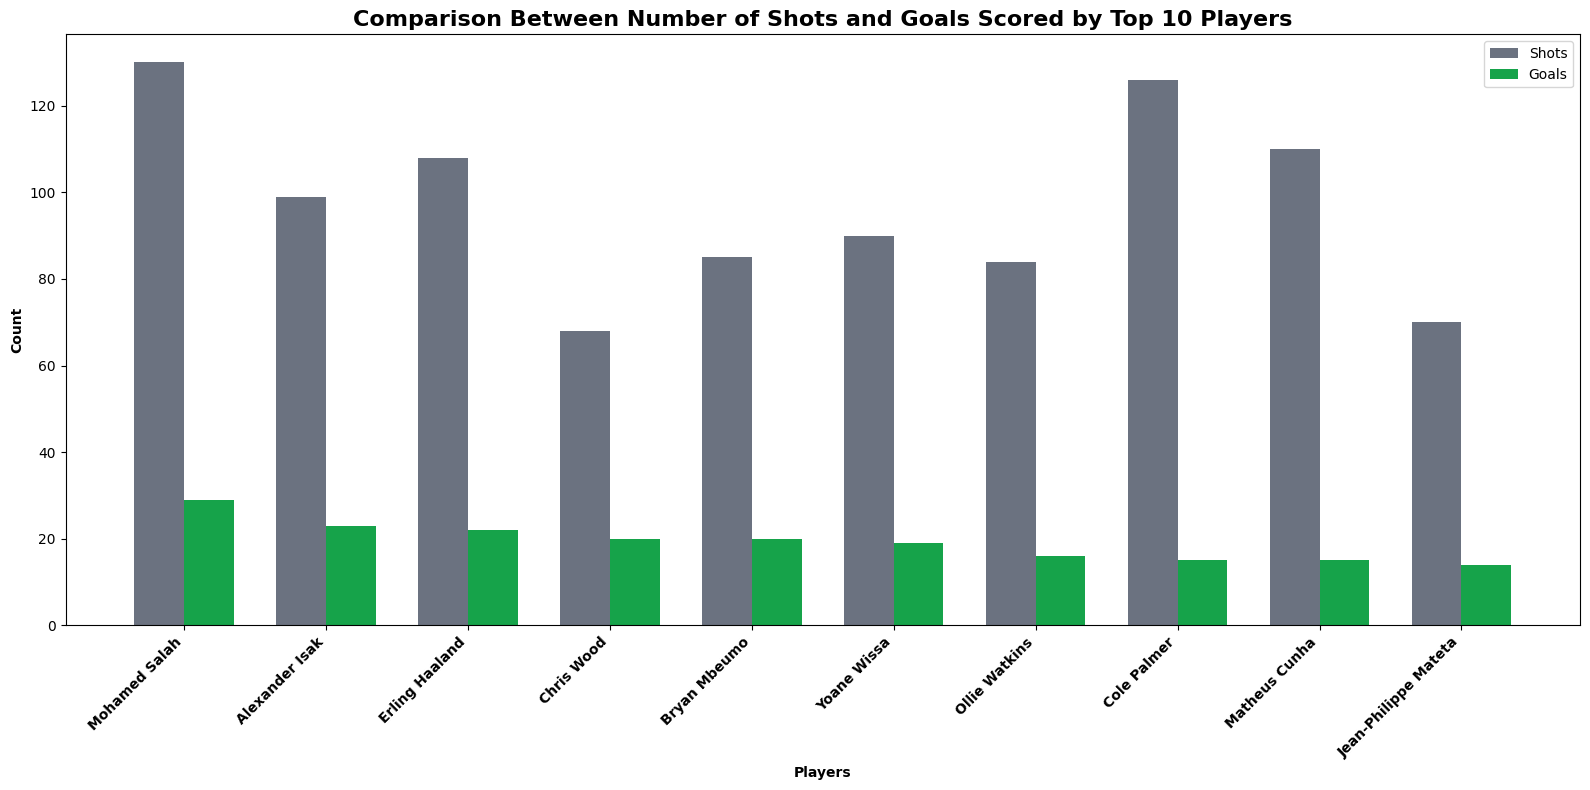

In [48]:
top_players_names = top_10_scorers.index
top_players = df[df['Player Name'].isin(top_players_names)][['Player Name', 'Shots', 'Goals']].set_index('Player Name').loc[top_players_names].reset_index()

players = top_players["Player Name"]
shots = top_players["Shots"]
goals = top_players["Goals"]

x = np.arange(len(players))
width = 0.35

plt.figure(figsize=(16,8))

plt.bar(x - width/2, shots, width,
        label="Shots",
        color="#6B7280")

plt.bar(x + width/2, goals, width,
        label="Goals",
        color="#16A34A")

plt.xlabel("Players", fontweight="bold")
plt.ylabel("Count", fontweight="bold")

plt.title(
    "Comparison Between Number of Shots and Goals Scored by Top 10 Players",
    fontsize=16,
    fontweight="bold"
)

plt.xticks(x, players, rotation=45, ha="right", fontweight="bold")
plt.legend()

plt.tight_layout()
plt.show()

##Who are the top 10 players who miss the most chances?

In [49]:
top_bigchance_missed = df.groupby('Player Name')['Big Chances Missed'].sum().sort_values(ascending=False).head(10)
top_bigchance_missed

,Big Chances Missed
Player Name,
Ollie Watkins,27
Mohamed Salah,24
Erling Haaland,21
Nicolas Jackson,19
Alexander Isak,18
Jean-Philippe Mateta,18
Yoane Wissa,17
Ismaïla Sarr,17
Dominic Calvert-Lewin,16


In [50]:
Big_Chance_color = {
    "Ollie Watkins": "#670E36",            # Aston Villa
    "Mohamed Salah": "#C8102E",            # Liverpool
    "Erling Haaland": "#6CABDD",           # Man City
    "Nicolas Jackson": "#034694",          # Chelsea
    "Alexander Isak": "#241F20",           # Newcastle
    "Jean-Philippe Mateta": "#1B458F" ,    # Crystal Palace
    "Yoane Wissa": "#FF4C4C",              # Brentford
    "Ismaïla Sarr": "#1B458F",             # Crystal Palace
    "Dominic Calvert-Lewin":"#003399",     # Everton
    "Chris Wood": "#8B0000",               # Nottingham Forest
}

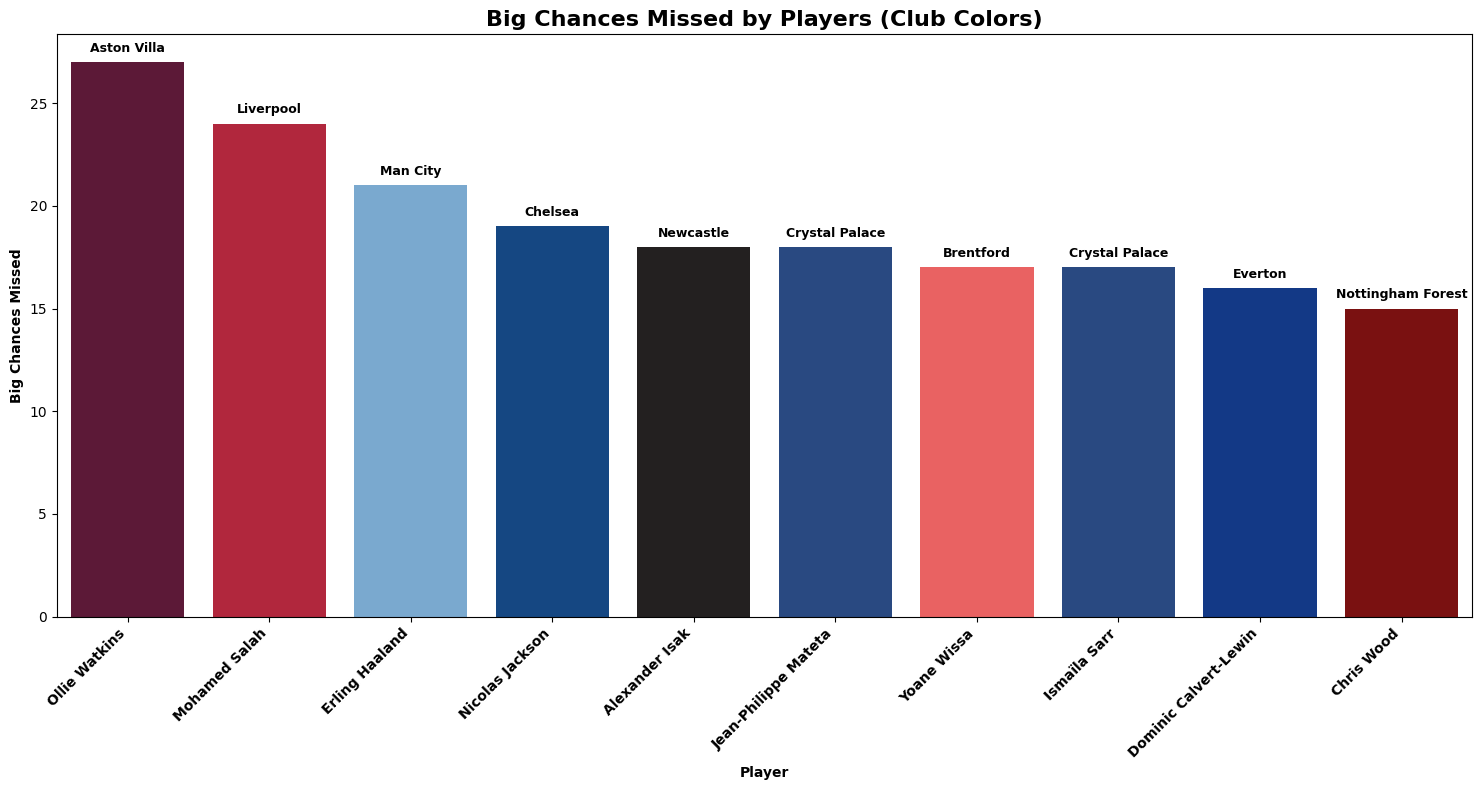

In [51]:
plt.figure(figsize=(15,8))

sns.barplot(
    data=top_bigchance_missed.reset_index(),
    x="Player Name",
    y="Big Chances Missed",
    hue="Player Name",
    palette=Big_Chance_color
)

clubs = [
    'Aston Villa','Liverpool','Man City',
    'Chelsea','Newcastle', 'Crystal Palace', 'Brentford',
    'Crystal Palace', 'Everton' , 'Nottingham Forest'
]

ax = plt.gca()
for i, club in enumerate(clubs):
    ax.text(
        i,
        top_bigchance_missed.iloc[i] + 0.5,
        club,
        ha="center",
        fontsize=9,
        fontweight="bold"
    )

plt.title(
    "Big Chances Missed by Players (Club Colors)",
    fontsize=16,
    fontweight="bold"
)

plt.xlabel("Player", fontweight="bold")
plt.ylabel("Big Chances Missed", fontweight="bold")

plt.xticks(rotation=45, ha="right", fontweight="bold")

plt.tight_layout()
plt.show()

##Who are the top 10 players who made the most accurate crosses?

In [52]:
top_10_successful_crosses = df.groupby('Player Name')['Successful Crosses'].sum().sort_values(ascending=False).head(10)
top_10_successful_crosses

,Successful Crosses
Player Name,
Antoine Semenyo,42
Mikkel Damsgaard,35
Pedro Neto,34
Paul Onuachu,34
Adama Traoré,30
Virgil van Dijk,28
Kaoru Mitoma,25
Alex Iwobi,25
Toti Gomes,23


In [53]:
Successful_Crosses_colors = {
    "Antoine Semenyo": "#DA291C",      # Bournemouth
    "Mikkel Damsgaard": "#E30613",     # Brentford
    "Pedro Neto": "#FDB913",           # Wolves
    "Paul Onuachu": "#D71920",         # Southampton
    "Adama Traoré": "#000000",         # Fulham
    "Virgil van Dijk": "#C8102E",      # Liverpool
    "Kaoru Mitoma": "#0057B8",         # Brighton
    "Alex Iwobi": "#000000",           # Fulham
    "Toti Gomes": "#FDB913",           # Wolves
    "Bruno Guimarães": "#241F20"       # Newcastle
}

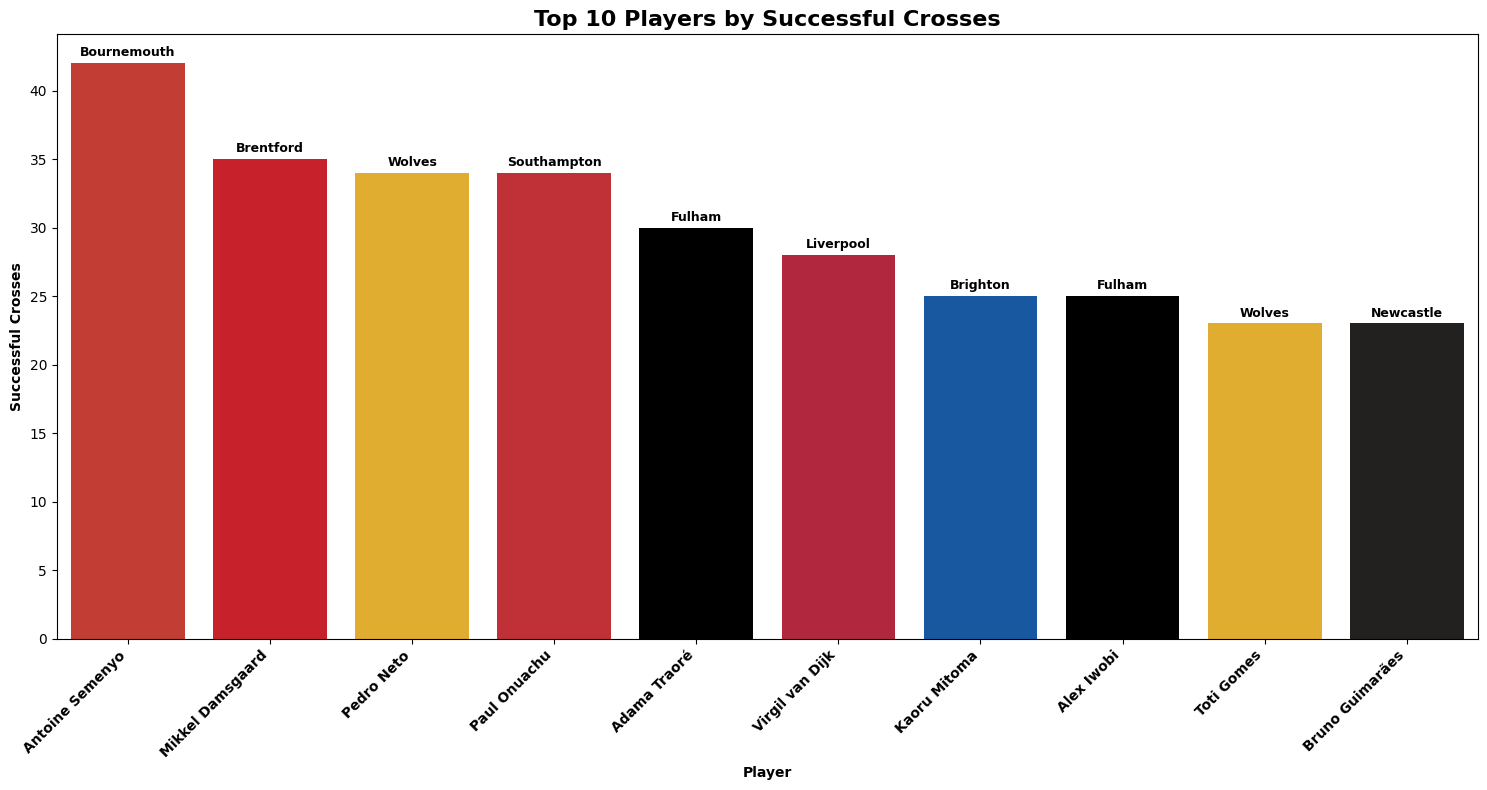

In [54]:
plt.figure(figsize=(15,8))

sns.barplot(
    data = top_10_successful_crosses.reset_index(),
    x='Player Name',
    y='Successful Crosses',
    hue='Player Name',
    palette=Successful_Crosses_colors
)

clubs = [
    'Bournemouth','Brentford','Wolves',
    'Southampton','Fulham', 'Liverpool', 'Brighton',
    'Fulham', 'Wolves' , 'Newcastle'
]

ax = plt.gca()
for i, club in enumerate(clubs):
    ax.text(
        i,
        top_10_successful_crosses.iloc[i] + 0.5,
        club,
        ha="center",
        fontsize=9,
        fontweight="bold"
    )

plt.title(
    "Top 10 Players by Successful Crosses",
    fontsize=16,
    fontweight="bold"
)

plt.xlabel("Player", fontweight="bold")
plt.ylabel("Successful Crosses", fontweight="bold")

plt.xticks(rotation=45, ha="right", fontweight="bold")

plt.tight_layout()
plt.show()

##Who are the players that make the most through passes?

In [55]:
top_10_Through_Balls = df.groupby('Player Name')['Through Balls'].sum().sort_values(ascending=False).head(10)
top_10_Through_Balls

,Through Balls
Player Name,
Brennan Johnson,31
Mikel Merino,27
Marshall Munetsi,25
Yoane Wissa,24
Cody Gakpo,22
Morgan Gibbs-White,22
Bruno Fernandes,22
Milos Kerkez,19
Moisés Caicedo,19


In [56]:
through_ball_colors = {
    "Brennan Johnson": "#4B5563",        # Tottenham
    "Mikel Merino": "#c1121f",           # Arsenal
    "Marshall Munetsi": "#C8102E",       # Nottingham Forest
    "Yoane Wissa": "#E30613",            # Brentford
    "Cody Gakpo": "#C8102E",             # Liverpool
    "Morgan Gibbs-White": "#DD0000",     # Nottingham Forest
    "Bruno Fernandes": "#DA291C",        # Manchester United
    "Milos Kerkez": "#DA291C",           # Bournemouth
    "Moisés Caicedo": "#034694",         # Chelsea
    "Lucas Digne": "#670E36"             # Aston Villa
}

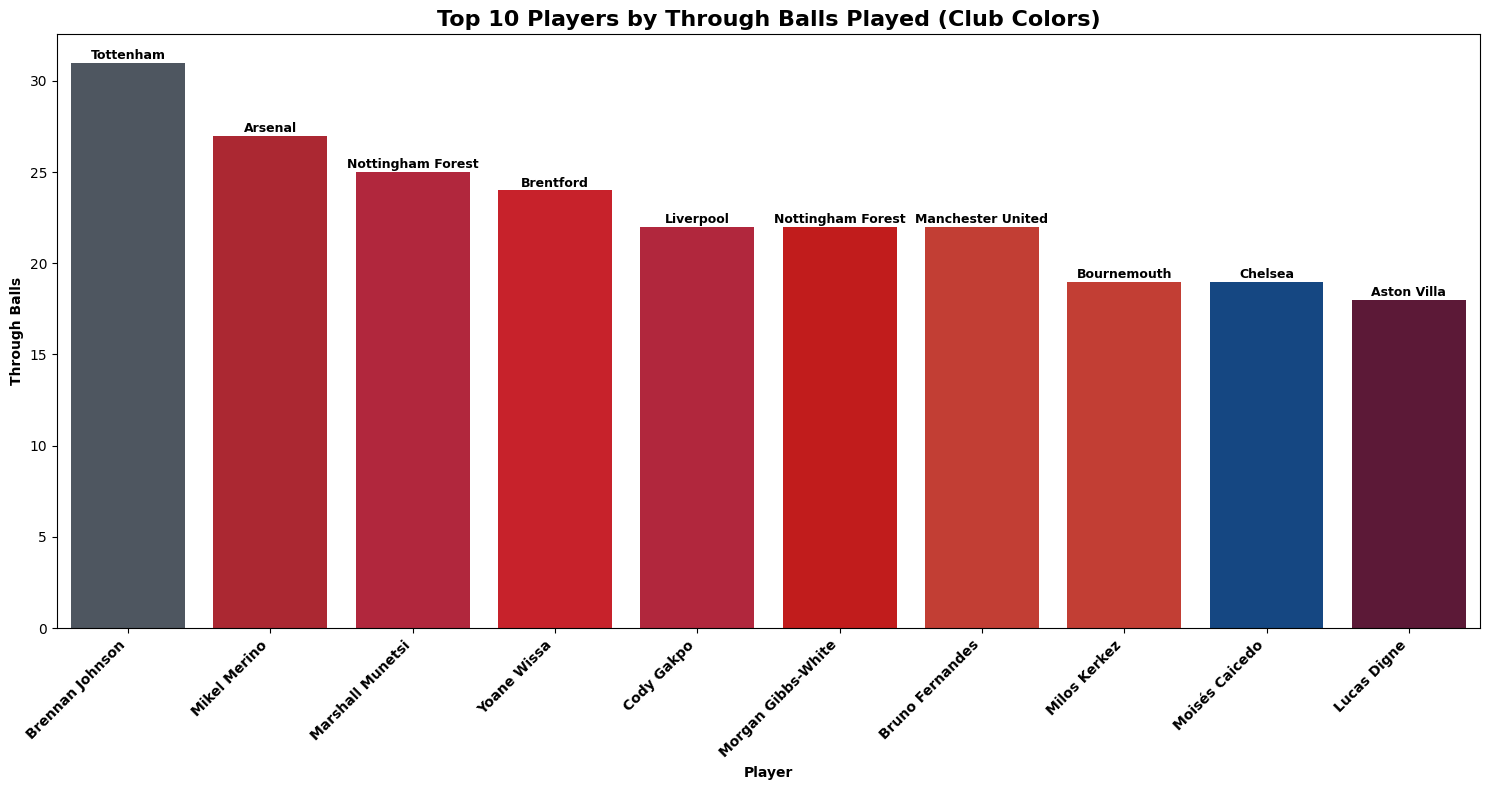

In [57]:
plt.figure(figsize=(15,8))

sns.barplot(
    data=top_10_Through_Balls.reset_index(),
    x='Player Name',
    y='Through Balls',
    hue='Player Name',
    palette=through_ball_colors
)

clubs = [
    'Tottenham','Arsenal','Nottingham Forest',
    'Brentford','Liverpool','Nottingham Forest',
    'Manchester United','Bournemouth','Chelsea',
    'Aston Villa'
]

ax = plt.gca()
for i, club in enumerate(clubs):
    ax.text(
        i,
        top_10_Through_Balls.iloc[i] + 0.2,
        club,
        ha="center",
        fontsize=9,
        fontweight="bold"
    )

plt.title(
    "Top 10 Players by Through Balls Played (Club Colors)",
    fontsize=16,
    fontweight="bold"
)

plt.xlabel("Player", fontweight="bold")
plt.ylabel("Through Balls", fontweight="bold")

plt.xticks(rotation=45, ha="right", fontweight="bold")

plt.tight_layout()
plt.show()

##Who are the top 10 players with the most yellow cards?

In [58]:
top_10_yellow_card = df.groupby('Player Name')['Yellow Cards'].sum().sort_values(ascending=False).head(10)
top_10_yellow_card

,Yellow Cards
Player Name,
Liam Delap,12
Flynn Downes,12
Sasa Lukic,12
Will Hughes,11
Moisés Caicedo,11
Dan Burn,11
Manuel Ugarte,11
Morgan Rogers,10
Joelinton,10


In [59]:
yellow_cards_colors = {
    "Liam Delap": "#03045e",        # Ipswich Town
    "Flynn Downes": "#D71920",      # Southampton
    "Sasa Lukic": "#000000",        # Fulham
    "Will Hughes": "#1B458F",       # Crystal Palace
    "Moisés Caicedo": "#034694",    # Chelsea
    "Dan Burn": "#241F20",          # Newcastle United
    "Manuel Ugarte": "#DA291C",     # Manchester United
    "Morgan Rogers": "#670E36",     # Aston Villa
    "Joelinton": "#241F20",         # Newcastle United
    "Daniel Muñoz": "#1B458F"       # Crystal Palace
}

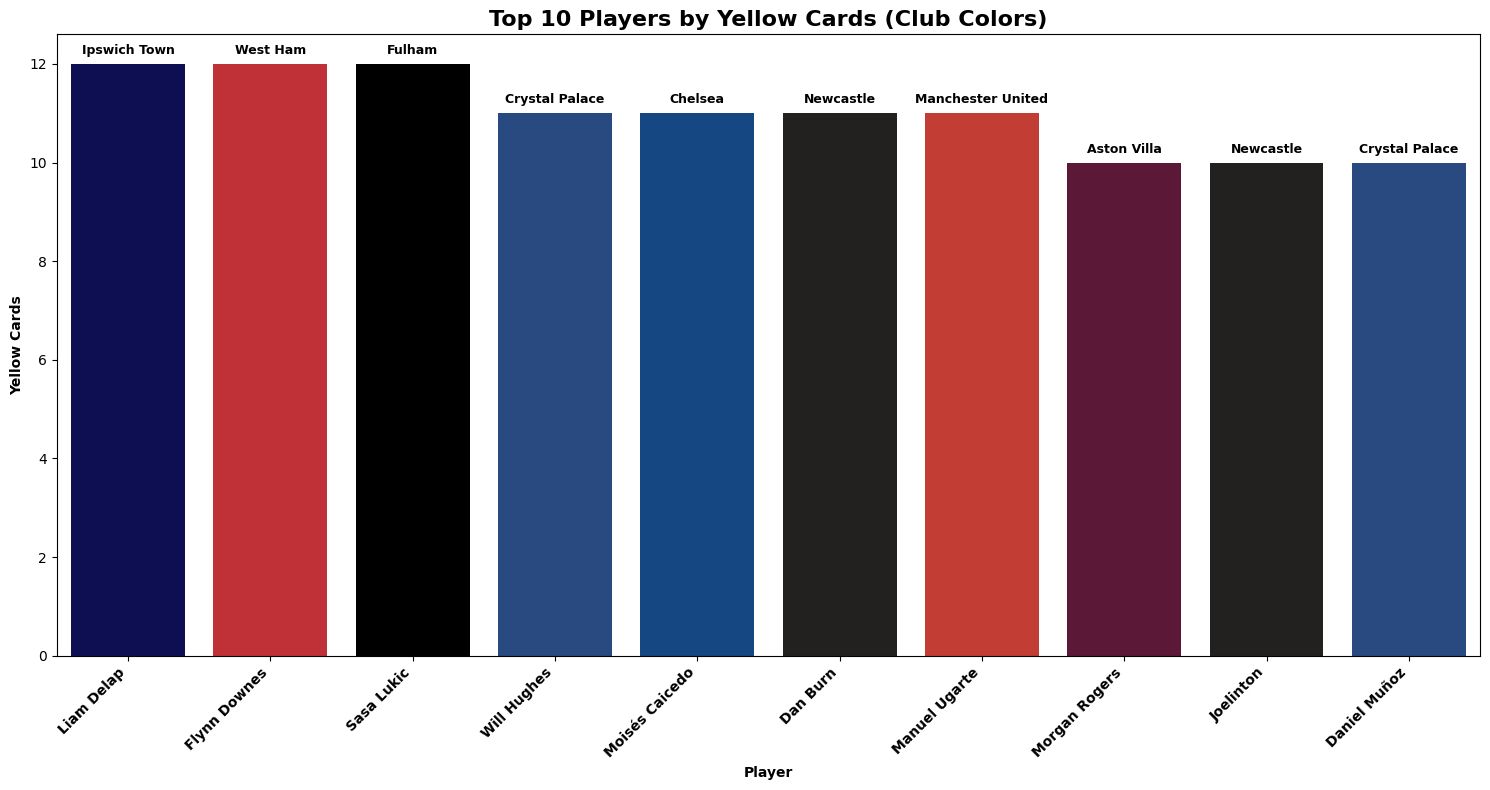

In [60]:
plt.figure(figsize=(15,8))

sns.barplot(
    data=top_10_yellow_card.reset_index(),
    x='Player Name',
    y='Yellow Cards',
    hue='Player Name',
    palette=yellow_cards_colors
)

clubs = [
    "Ipswich Town","West Ham","Fulham","Crystal Palace",
    "Chelsea","Newcastle","Manchester United",
    "Aston Villa","Newcastle","Crystal Palace"
]

ax = plt.gca()
for i, club in enumerate(clubs):
    ax.text(
        i,
        top_10_yellow_card.iloc[i] + 0.2,
        club,
        ha="center",
        fontsize=9,
        fontweight="bold"
    )


plt.title(
    "Top 10 Players by Yellow Cards (Club Colors)",
    fontsize=16,
    fontweight="bold"
)

plt.xlabel("Player", fontweight="bold")
plt.ylabel("Yellow Cards", fontweight="bold")

plt.xticks(rotation=45, ha="right", fontweight="bold")

plt.tight_layout()
plt.show()

##Who are the top 5 players with the most red cards?

In [61]:
top_5_red_cards = df.groupby('Player Name')['Red Cards'].sum().sort_values(ascending=False).head(5)
top_5_red_cards

,Red Cards
Player Name,
Myles Lewis-Skelly,2
Bruno Fernandes,2
Jack Stephens,2
Andy Robertson,1
Declan Rice,1


In [62]:
red_cards_colors = {
    "Myles Lewis-Skelly": "#c1121f",    # Arsenal
    "Bruno Fernandes": "#DA291C",       # Manchester United
    "Jack Stephens": "#D71920",         # Southampton
    "Andy Robertson": "#C8102E",        # Liverpool
    "Declan Rice": "#c1121f",           # Arsenal
}

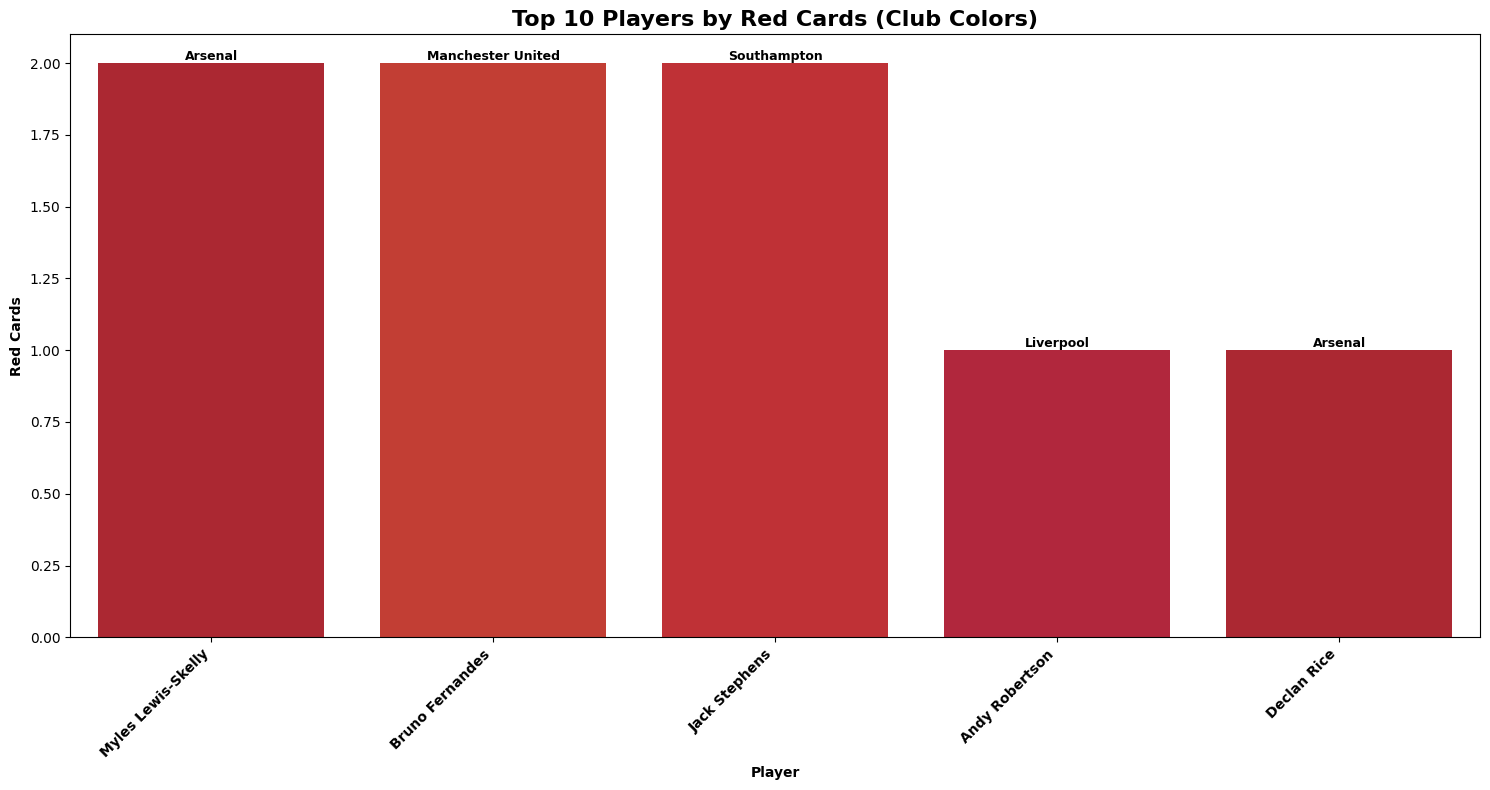

In [63]:
plt.figure(figsize=(15,8))

sns.barplot(
    data=top_5_red_cards.reset_index(),
    x='Player Name',
    y='Red Cards',
    hue='Player Name',
    palette=red_cards_colors
)

clubs = [
    'Arsenal','Manchester United','Southampton',
    'Liverpool','Arsenal'
]

ax = plt.gca()
for i, club in enumerate(clubs):
    ax.text(
        i,
        top_5_red_cards.iloc[i] + 0.01,
        club,
        ha="center",
        fontsize=9,
        fontweight="bold"
    )


plt.title(
    "Top 10 Players by Red Cards (Club Colors)",
    fontsize=16,
    fontweight="bold"
)

plt.xlabel("Player", fontweight="bold")
plt.ylabel("Red Cards", fontweight="bold")

plt.xticks(rotation=45, ha="right", fontweight="bold")

plt.tight_layout()
plt.show()

##Who are the top 10 players with the most blocks?

In [64]:
top_10_blocks = df.groupby('Player Name')['Blocks'].sum().sort_values(ascending=False).head(10)
top_10_blocks

,Blocks
Player Name,
Myles Lewis-Skelly,57
Danny Welbeck,47
Morgan Rogers,42
James Maddison,41
Stephy Mavididi,40
Maxence Lacroix,40
Savinho,37
Jamie Vardy,34
William Saliba,34


In [65]:
blocks_colors = {
    'Myles Lewis-Skelly': '#EF0107',         # Arsenal
    "Danny Welbeck": "#0057B8",              # Brighton
    'Morgan Rogers': '#670E36',              # Aston Villa
    'James Maddison': '#4B5563',             # Tottenham
    'Stephy Mavididi': '#003090',            # Leicester
    "Maxence Lacroix": "#1B458F",            # Crystal Palace
    'Savinho': '#6CABDD',                    # Man City
    'Jamie Vardy': '#003090',                # Leicester
    'William Saliba': '#EF0107',             # Arsenal
    "Flynn Downes": "#D71920",               # Southampton
}

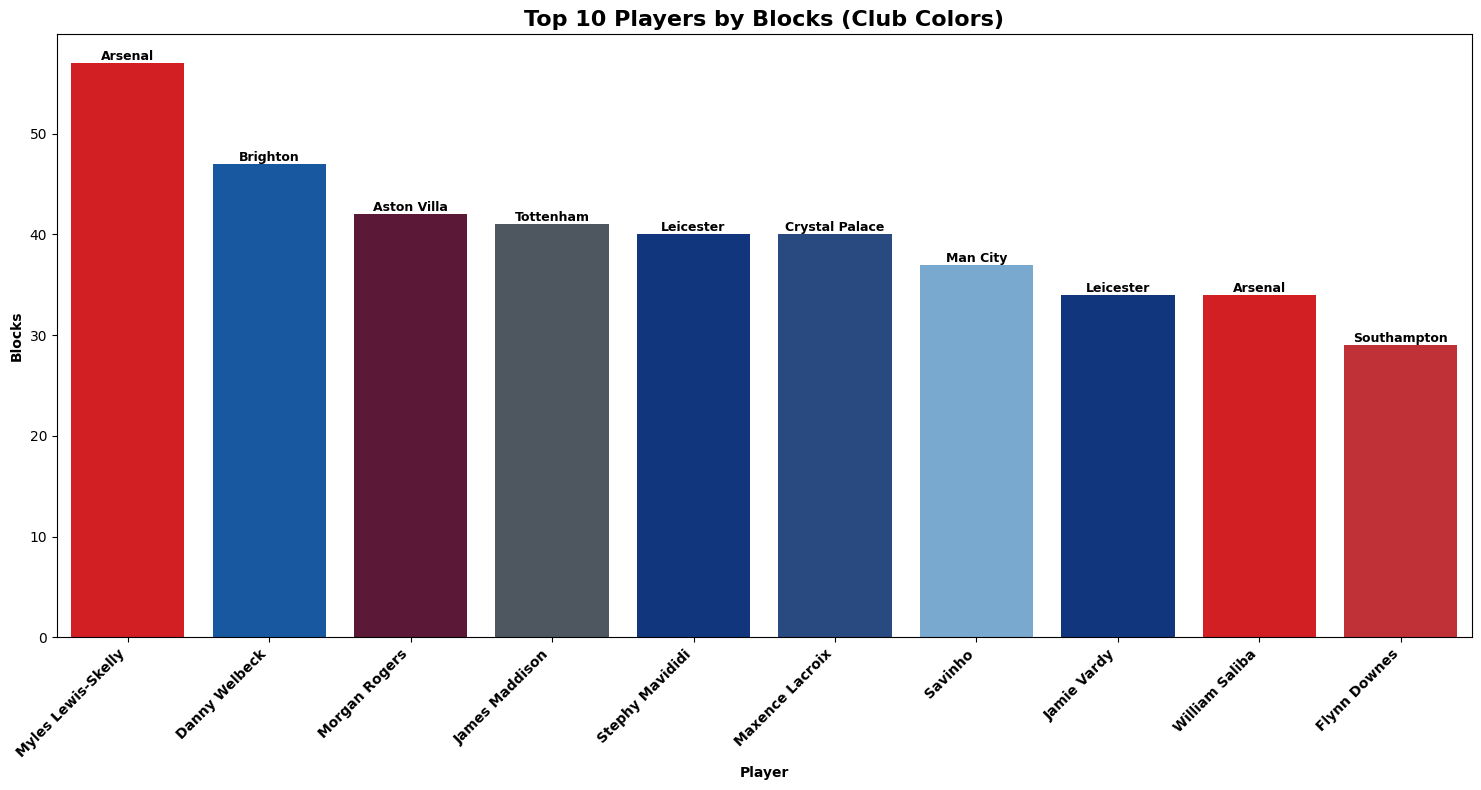

In [66]:
plt.figure(figsize=(15,8))

sns.barplot(
    data=top_10_blocks.reset_index(),
    x='Player Name',
    y='Blocks',
    hue='Player Name',
    palette=blocks_colors
)

clubs = [
    'Arsenal','Brighton','Aston Villa',
    'Tottenham','Leicester', 'Crystal Palace', 'Man City',
    'Leicester', 'Arsenal' , 'Southampton'
]

ax = plt.gca()
for i, club in enumerate(clubs):
    ax.text(
        i,
        top_10_blocks.iloc[i] + 0.3,
        club,
        ha="center",
        fontsize=9,
        fontweight="bold"
    )


plt.title(
    "Top 10 Players by Blocks (Club Colors)",
    fontsize=16,
    fontweight="bold"
)

plt.xlabel("Player", fontweight="bold")
plt.ylabel("Blocks", fontweight="bold")

plt.xticks(rotation=45, ha="right", fontweight="bold")

plt.tight_layout()
plt.show()

##Who are the top 10 players with the most ground tackles?

In [67]:
top_10_gduelswon = df.groupby('Player Name')['gDuels Won'].sum().sort_values(ascending=False).head(10)
top_10_gduelswon

,gDuels Won
Player Name,
Bruno Fernandes,224
Mohammed Kudus,200
Rasmus Højlund,198
Ibrahima Konaté,196
Mohamed Salah,194
Mateo Kovacic,193
Joelinton,193
Edson Álvarez,185
Igor Julio,171


In [68]:
gduelswon_colors = {
    'Bruno Fernandes': '#DA291C',       # Man United
    'Mohammed Kudus': '#7A263A',        # West Ham
    'Rasmus Højlund': '#DA291C',        # Man United
    'Ibrahima Konaté': '#C8102E',       # Liverpool
    'Mohamed Salah': '#C8102E',         # Liverpool
    'Mateo Kovacic': '#6CABDD',         # Man City
    'Joelinton': '#241F20',             # Newcastle
    'Edson Álvarez': '#6CABDD',         # Man City
    'Igor Julio': '#0057B8',            # Brighton
    'Julio Enciso': '#03045e'           # Ipswich Town
}

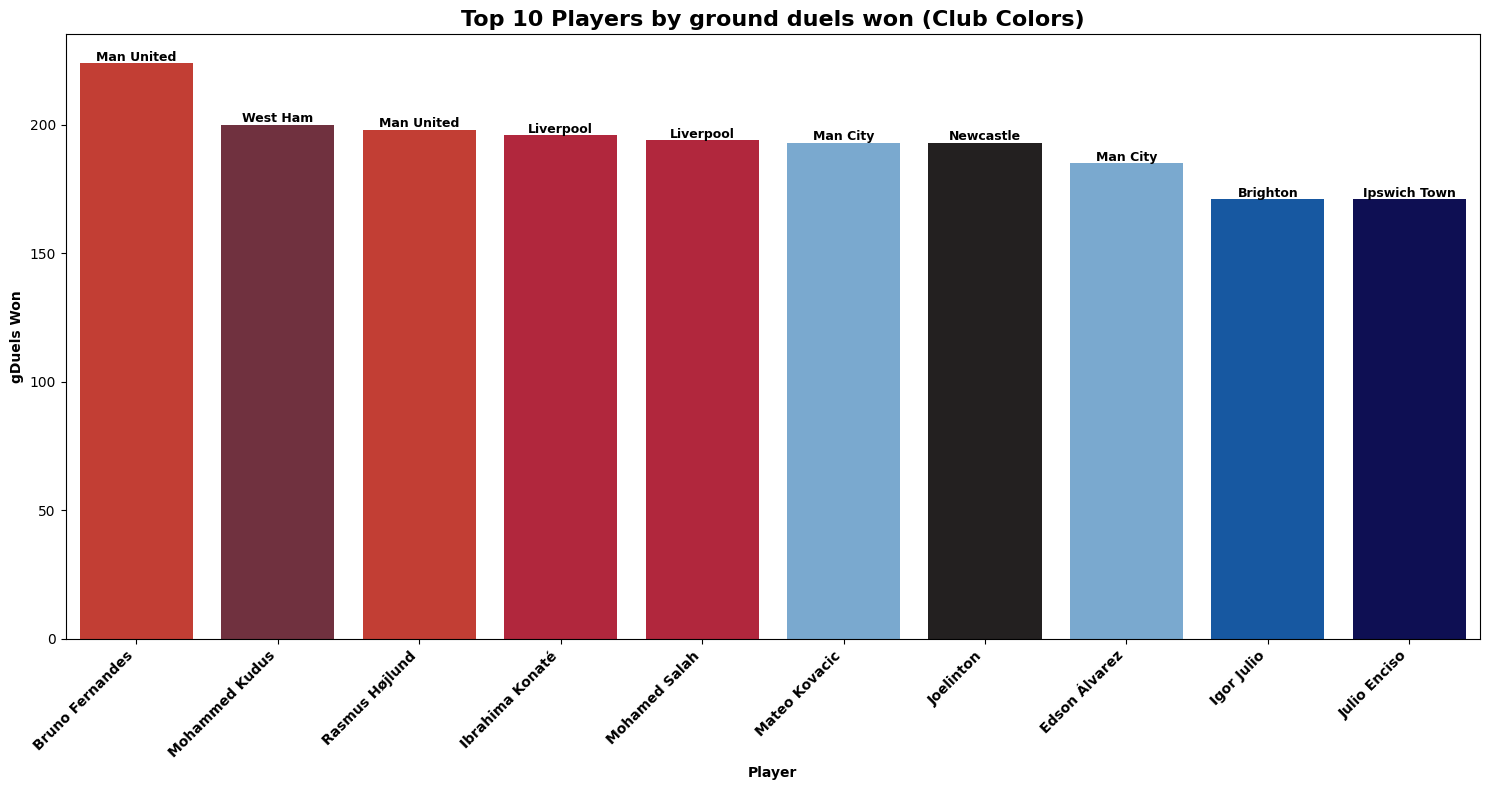

In [69]:
plt.figure(figsize=(15,8))

sns.barplot(
    data=top_10_gduelswon.reset_index(),
    x='Player Name',
    y='gDuels Won',
    hue='Player Name',
    palette=gduelswon_colors
)

clubs = [
    'Man United','West Ham','Man United',
    'Liverpool','Liverpool', 'Man City', 'Newcastle',
    'Man City', 'Brighton' , 'Ipswich Town'
]

ax = plt.gca()
for i, club in enumerate(clubs):
    ax.text(
        i,
        top_10_gduelswon.iloc[i] + 1,
        club,
        ha="center",
        fontsize=9,
        fontweight="bold"
    )


plt.title(
    "Top 10 Players by ground duels won (Club Colors)",
    fontsize=16,
    fontweight="bold"
)

plt.xlabel("Player", fontweight="bold")
plt.ylabel("gDuels Won", fontweight="bold")

plt.xticks(rotation=45, ha="right", fontweight="bold")

plt.tight_layout()
plt.show()

##Who are the top 10 players with the most aerial duels?

In [70]:
top_10_aduelswon = df.groupby('Player Name')['aDuels Won'].sum().sort_values(ascending=False).head(10)
top_10_aduelswon

,aDuels Won
Player Name,
Daichi Kamada,148
Myles Lewis-Skelly,119
Victor Kristiansen,119
Danny Welbeck,117
Maxence Lacroix,113
James Maddison,103
Tino Livramento,101
Nicolás Domínguez,101
Bernardo Silva,99


In [71]:
aDuelsWon_colors = {
    "Daichi Kamada": "#1B458F",              # Crystal Palace
    'Myles Lewis-Skelly': '#EF0107',         # Arsenal
    'Victor Kristiansen': '#003090',         # Leicester
    "Danny Welbeck": "#0057B8",              # Brighton
    "Maxence Lacroix": "#1B458F",            # Crystal Palace
    'James Maddison': '#4B5563',             # Tottenham
    'Tino Livramento': '#241F20',            # Newcastle
    'Nicolás Domínguez': '#C8102E',          # Nottingham Forest
    'Bernardo Silva': '#6CABDD',             # Man City
    "Chris Richards": "#1B458F",             # Crystal Palace
}

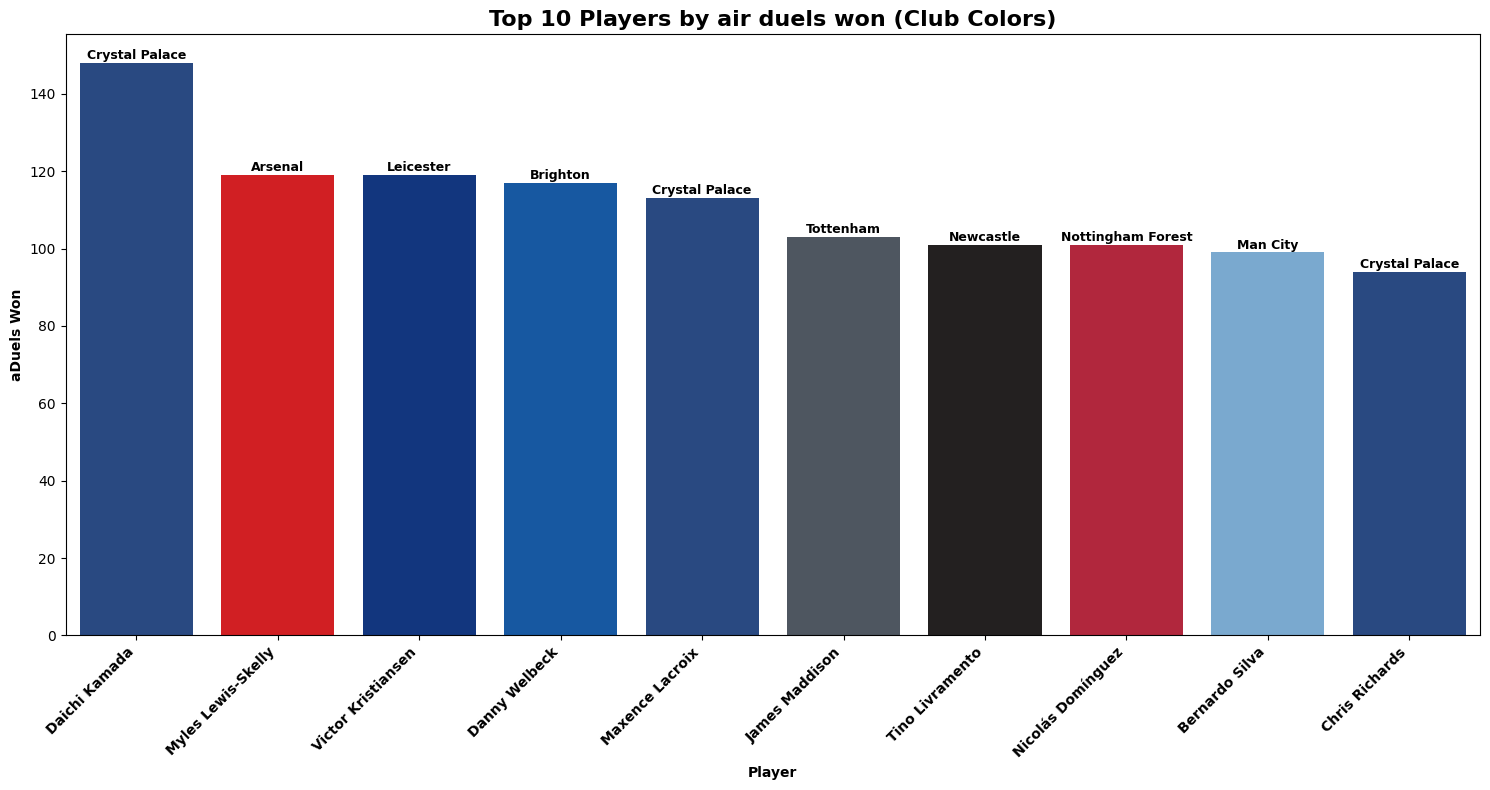

In [72]:
plt.figure(figsize=(15,8))

sns.barplot(
    data=top_10_aduelswon.reset_index(),
    x='Player Name',
    y='aDuels Won',
    hue='Player Name',
    palette=aDuelsWon_colors
)

clubs = [
    'Crystal Palace','Arsenal','Leicester',
    'Brighton','Crystal Palace', 'Tottenham', 'Newcastle',
    'Nottingham Forest', 'Man City' , 'Crystal Palace'
]

ax = plt.gca()
for i, club in enumerate(clubs):
    ax.text(
        i,
        top_10_aduelswon.iloc[i] + 1,
        club,
        ha="center",
        fontsize=9,
        fontweight="bold"
    )


plt.title(
    "Top 10 Players by air duels won (Club Colors)",
    fontsize=16,
    fontweight="bold"
)

plt.xlabel("Player", fontweight="bold")
plt.ylabel("aDuels Won", fontweight="bold")

plt.xticks(rotation=45, ha="right", fontweight="bold")

plt.tight_layout()
plt.show()

##Who are the top 10 players with the most interceptions of opponent passes?

In [73]:
top_10_Interceptions = df.groupby('Player Name')['Interceptions'].sum().sort_values(ascending=False).head(10)
top_10_Interceptions

,Interceptions
Player Name,
Aaron Wan-Bissaka,66
Antoine Semenyo,62
Rúben Dias,60
Jamie Vardy,56
Victor Kristiansen,56
Matty Cash,54
David Brooks,51
Christian Eriksen,49
Mohammed Kudus,49


In [74]:
Interceptions_colors = {
    'Aaron Wan-Bissaka': '#7A263A',          # West Ham
    'Antoine Semenyo': '#DA291C',            # Bournemouth
    'Rúben Dias': '#6CABDD',                 # Man City
    'Jamie Vardy': '#003090',                # Leicester
    'Victor Kristiansen': '#003090',         # Leicester
    'Matty Cash': '#670E36',                 # Aston Villa
    'David Brooks': '#DA291C',               # Bournemouth
    'Christian Eriksen': '#DA291C',          # Manchester United
    'Mohammed Kudus': '#7A263A',             # West Ham
    'Ibrahima Konaté': '#C8102E',            # Liverpool
}

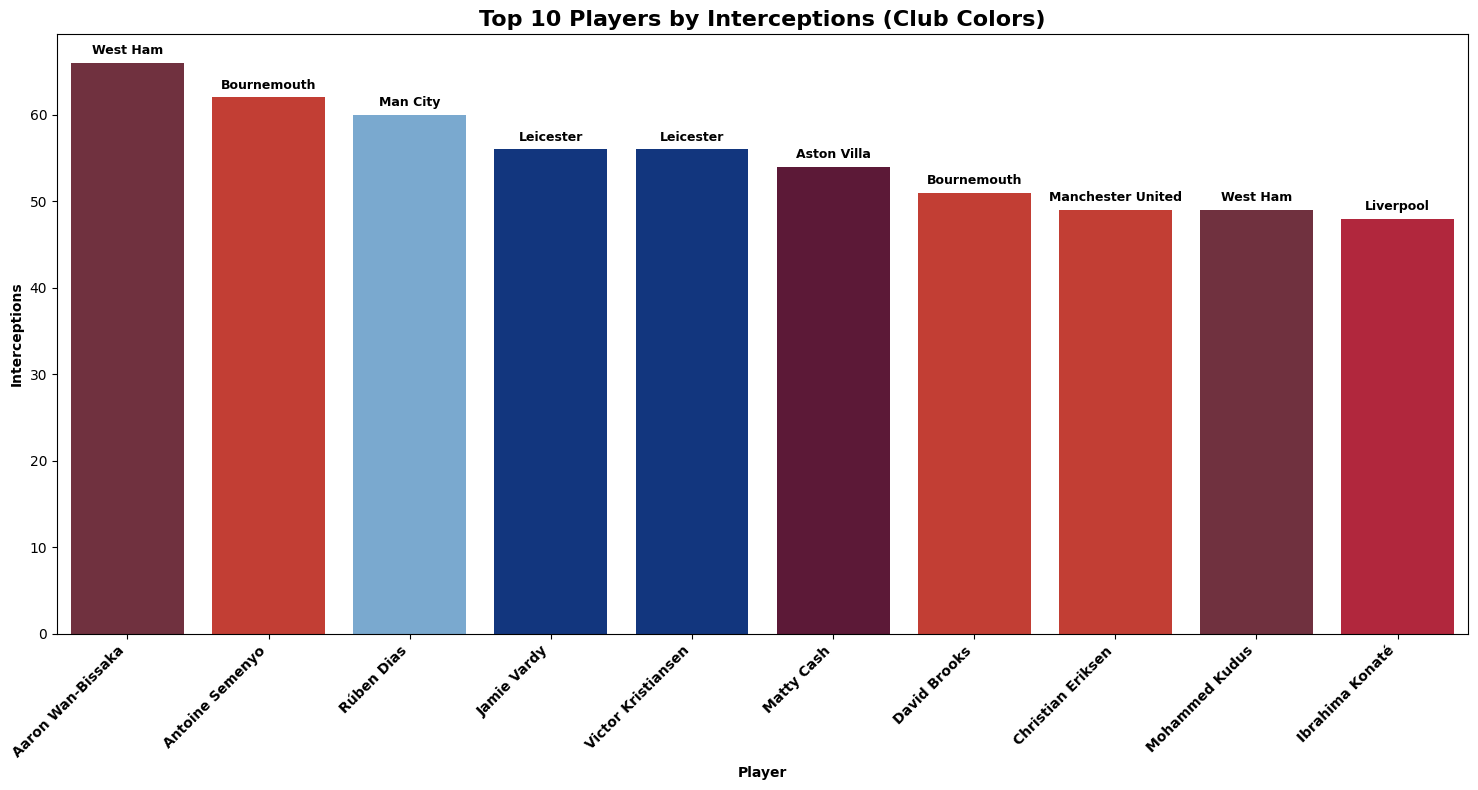

In [75]:
plt.figure(figsize=(15,8))

sns.barplot(
    data=top_10_Interceptions.reset_index(),
    x='Player Name',
    y='Interceptions',
    hue='Player Name',
    palette=Interceptions_colors
)

clubs = [
    'West Ham','Bournemouth','Man City',
    'Leicester','Leicester', 'Aston Villa', 'Bournemouth',
    'Manchester United', 'West Ham' , 'Liverpool'
]

ax = plt.gca()
for i, club in enumerate(clubs):
    ax.text(
        i,
        top_10_Interceptions.iloc[i] + 1,
        club,
        ha="center",
        fontsize=9,
        fontweight="bold"
    )


plt.title(
    "Top 10 Players by Interceptions (Club Colors)",
    fontsize=16,
    fontweight="bold"
)

plt.xlabel("Player", fontweight="bold")
plt.ylabel("Interceptions", fontweight="bold")

plt.xticks(rotation=45, ha="right", fontweight="bold")

plt.tight_layout()
plt.show()

##Who are the top 10 players who have made the most ball clearances?

In [76]:
top_10_clearances = df.groupby('Player Name')['Clearances'].sum().sort_values(ascending=False).head(10)
top_10_clearances

,Clearances
Player Name,
Murillo,242
Nathan Collins,220
Dara O'Shea,218
Maximilian Kilman,210
James Tarkowski,209
Nikola Milenkovic,208
Maxence Lacroix,203
Dean Huijsen,194
Dan Burn,194


In [77]:
Clearances_colors = {
    'Murillo': '#DD0000',              # Nottingham Forest
    'Nathan Collins': '#E30613',       # Brentford
    "Dara O'Shea": '#0053A0',          # Ipswich Town
    'Maximilian Kilman': '#7A263A',    # West Ham
    'James Tarkowski': '#003399',      # Everton
    'Nikola Milenkovic': '#DD0000',    # Nottingham Forest
    'Maxence Lacroix': '#1B458F',      # Crystal Palace
    'Dean Huijsen': '#DA291C',         # Bournemouth
    'Dan Burn': '#241F20',             # Newcastle United
    'Joachim Andersen': '#000000'      # Fulham
}

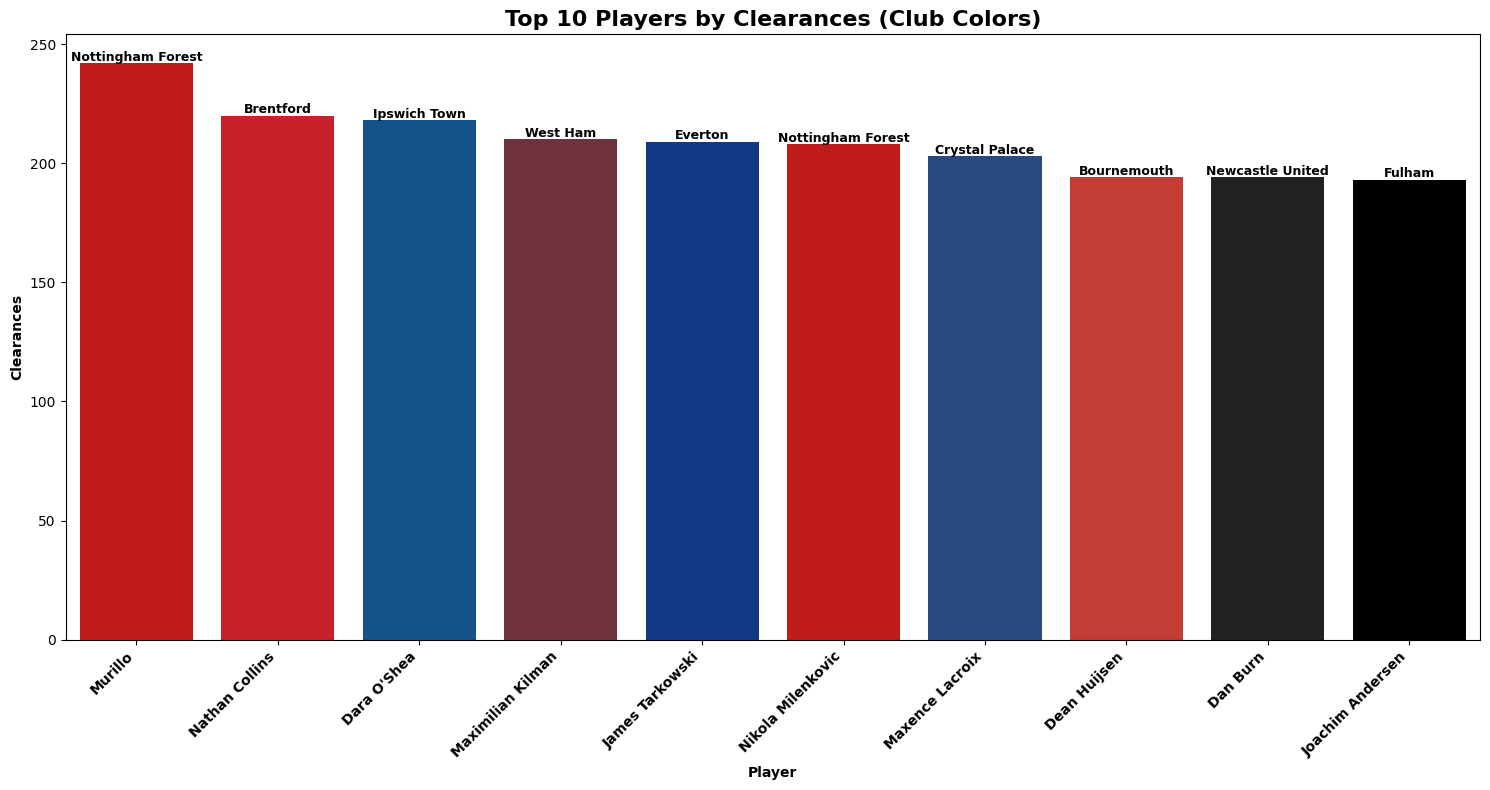

In [78]:
plt.figure(figsize=(15,8))

sns.barplot(
    data=top_10_clearances.reset_index(),
    x='Player Name',
    y='Clearances',
    hue='Player Name',
    palette=Clearances_colors
)

clubs = [
    'Nottingham Forest','Brentford','Ipswich Town',
    'West Ham','Everton', 'Nottingham Forest', 'Crystal Palace',
    'Bournemouth', 'Newcastle United' , 'Fulham'
]

ax = plt.gca()
for i, club in enumerate(clubs):
    ax.text(
        i,
        top_10_clearances.iloc[i] + 1,
        club,
        ha="center",
        fontsize=9,
        fontweight="bold"
    )


plt.title(
    "Top 10 Players by Clearances (Club Colors)",
    fontsize=16,
    fontweight="bold"
)

plt.xlabel("Player", fontweight="bold")
plt.ylabel("Clearances", fontweight="bold")

plt.xticks(rotation=45, ha="right", fontweight="bold")

plt.tight_layout()
plt.show()

##Who are the top 10 players in ball dispossession?

In [79]:
top_10_dispossessed = df.groupby('Player Name')['Dispossessed'].sum().sort_values(ascending=False).head(10)
top_10_dispossessed

,Dispossessed
Player Name,
Mohammed Kudus,93
Antoine Semenyo,77
Jarrod Bowen,77
Bruno Guimarães,76
Morgan Rogers,74
Dejan Kulusevski,74
Mohamed Salah,67
Liam Delap,60
Jérémy Doku,59


In [80]:
dispossessed_colors = {
    'Mohammed Kudus': '#7A263A',      # West Ham
    'Antoine Semenyo': '#DA291C',     # Bournemouth
    'Jarrod Bowen': '#7A263A',        # West Ham
    'Bruno Guimarães': '#241F20',     # Newcastle
    'Morgan Rogers': '#670E36',       # Aston Villa
    'Dejan Kulusevski': '#4B5563',    # Tottenham
    'Mohamed Salah': '#C8102E',       # Liverpool
    'Liam Delap': '#0053A0',          # Ipswich
    'Jérémy Doku': '#6CABDD',         # Man City
    'Omari Hutchinson': '#0053A0'     # Ipswich
}

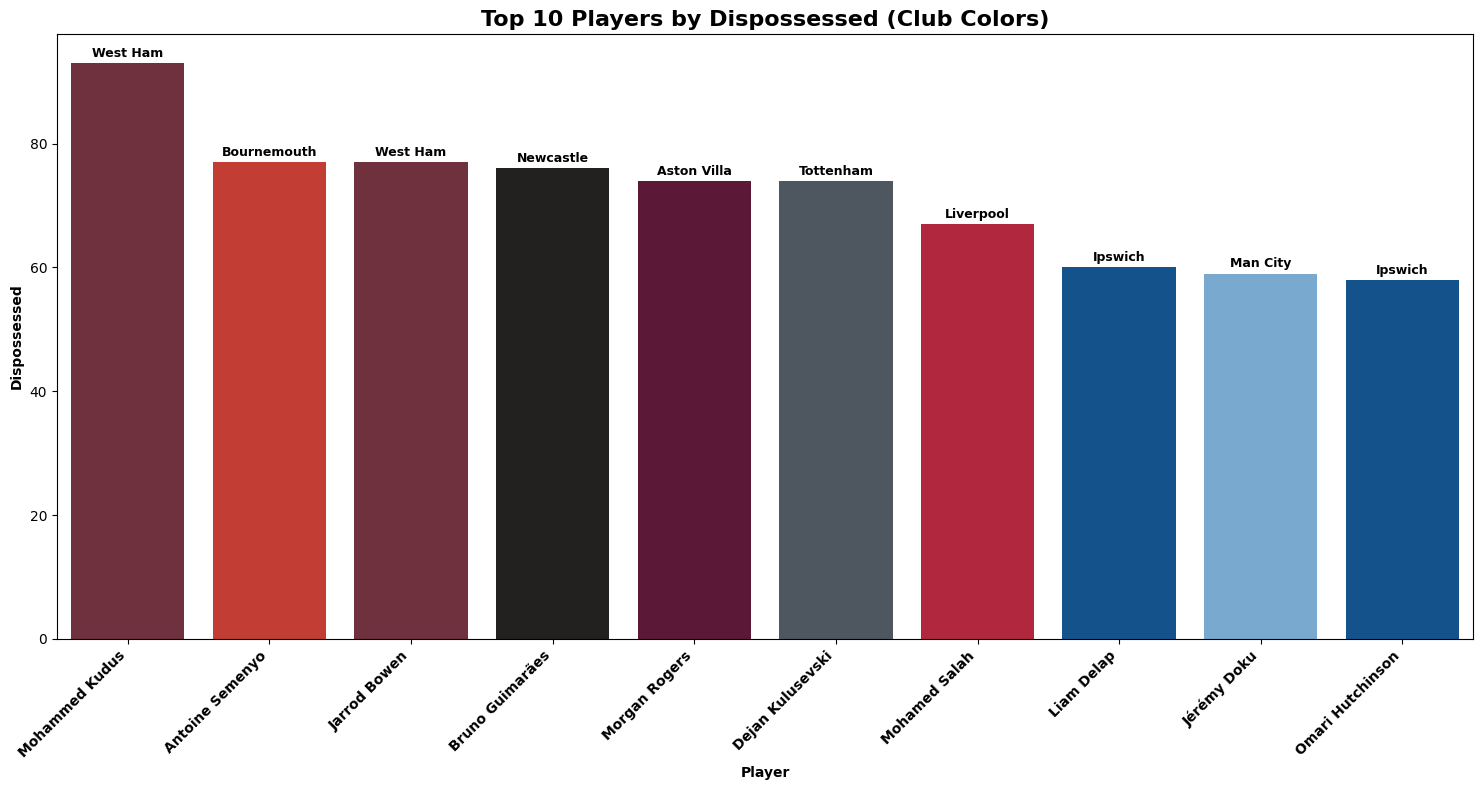

In [81]:
plt.figure(figsize=(15,8))

sns.barplot(
    data=top_10_dispossessed.reset_index(),
    x='Player Name',
    y='Dispossessed',
    hue='Player Name',
    palette=dispossessed_colors
)

clubs = [
    'West Ham','Bournemouth','West Ham',
    'Newcastle','Aston Villa', 'Tottenham', 'Liverpool',
    'Ipswich', 'Man City' , 'Ipswich'
]

ax = plt.gca()
for i, club in enumerate(clubs):
    ax.text(
        i,
        top_10_dispossessed.iloc[i] + 1,
        club,
        ha="center",
        fontsize=9,
        fontweight="bold"
    )


plt.title(
    "Top 10 Players by Dispossessed (Club Colors)",
    fontsize=16,
    fontweight="bold"
)

plt.xlabel("Player", fontweight="bold")
plt.ylabel("Dispossessed", fontweight="bold")

plt.xticks(rotation=45, ha="right", fontweight="bold")

plt.tight_layout()
plt.show()

##Who are the top 10 players with the most successful tackles?

In [82]:
top_10_tackles = df.groupby('Player Name')['Tackles'].sum().sort_values(ascending=False).head(10)
top_10_tackles

,Tackles
Player Name,
Idrissa Gueye,133
Daniel Muñoz,123
João Gomes,116
Noussair Mazraoui,115
Moisés Caicedo,114
Alexis Mac Allister,95
Antonee Robinson,95
Elliot Anderson,92
Tyrick Mitchell,91


In [83]:
Tackles_colors = {
    'Idrissa Gueye': '#003399',        # Everton
    'Daniel Muñoz': '#1B458F',         # Crystal Palace
    'João Gomes': '#FDB913',           # Wolves
    'Noussair Mazraoui': '#DA291C',    # Man United
    'Moisés Caicedo': '#034694',       # Chelsea
    'Alexis Mac Allister': '#C8102E',  # Liverpool
    'Antonee Robinson': '#000000',     # Fulham
    'Elliot Anderson': '#DD0000',      # Nottingham Forest
    'Tyrick Mitchell': '#1B458F',      # Crystal Palace
    'André': '#FDB913'                 # Wolves
}

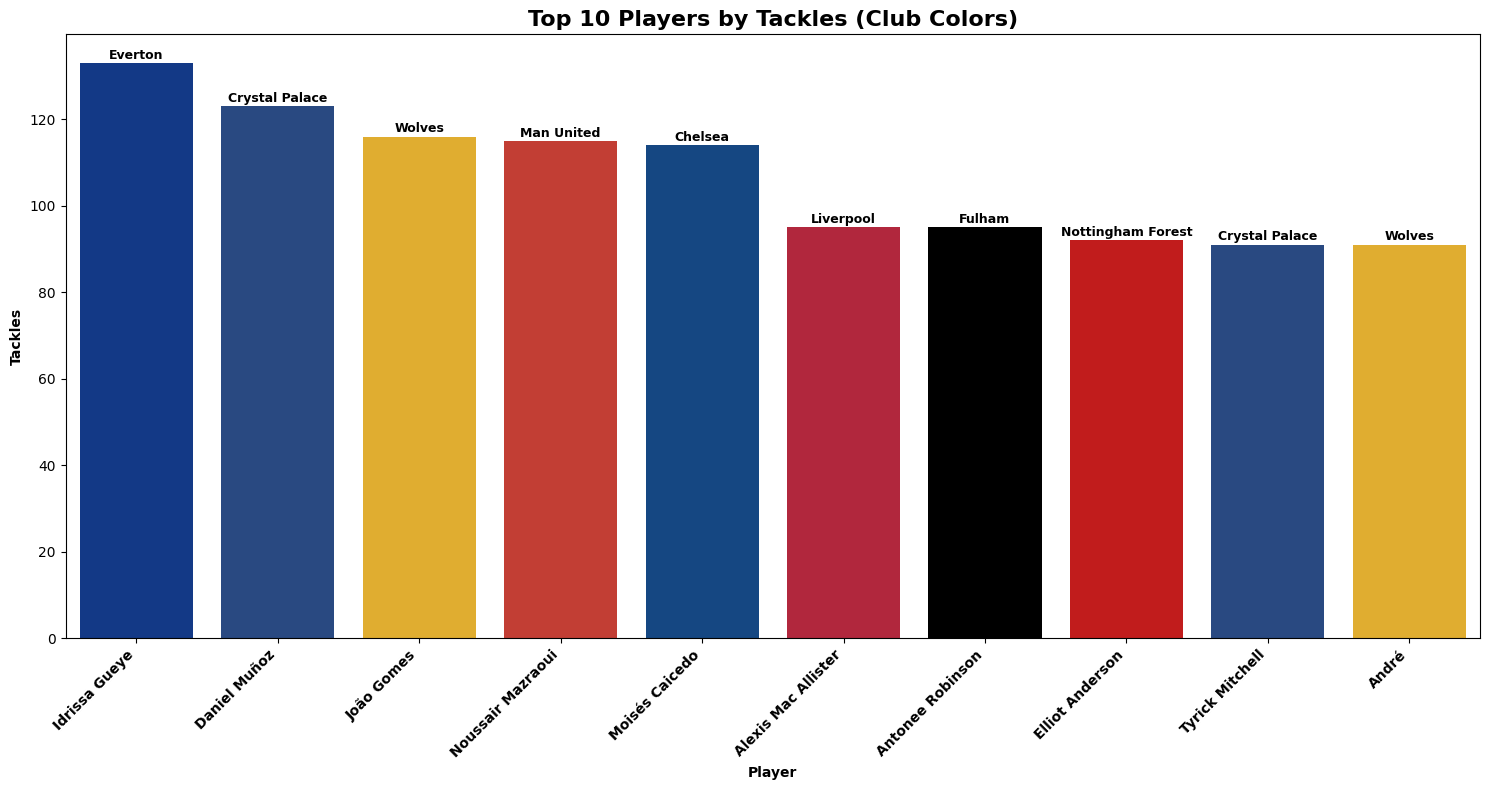

In [84]:
plt.figure(figsize=(15,8))

sns.barplot(
    data=top_10_tackles.reset_index(),
    x='Player Name',
    y='Tackles',
    hue='Player Name',
    palette=Tackles_colors
)

clubs = [
    'Everton','Crystal Palace','Wolves',
    'Man United','Chelsea', 'Liverpool', 'Fulham',
    'Nottingham Forest', 'Crystal Palace' , 'Wolves'
]

ax = plt.gca()
for i, club in enumerate(clubs):
    ax.text(
        i,
        top_10_tackles.iloc[i] + 1,
        club,
        ha="center",
        fontsize=9,
        fontweight="bold"
    )


plt.title(
    "Top 10 Players by Tackles (Club Colors)",
    fontsize=16,
    fontweight="bold"
)

plt.xlabel("Player", fontweight="bold")
plt.ylabel("Tackles", fontweight="bold")

plt.xticks(rotation=45, ha="right", fontweight="bold")

plt.tight_layout()
plt.show()

##Who are the top 5 goalkeepers in terms of saves?

In [85]:
top_5gkp_saves = df.groupby('Player Name')['Saves'].sum().sort_values(ascending=False).head(5)
top_5gkp_saves

,Saves
Player Name,
Mark Flekken,153
Aaron Ramsdale,125
Jordan Pickford,122
Matz Sels,120
Bernd Leno,110


In [86]:
gkp_saves_colors ={
    "Mark Flekken": "#E30613",        # Brentford
    "Aaron Ramsdale": "#D71920",      # Southampton
    "Jordan Pickford": "#003399",     # Everton
    "Matz Sels": "#C8102E",           # Nottingham Forest
    "Bernd Leno": "#000000",          # Fulham
}

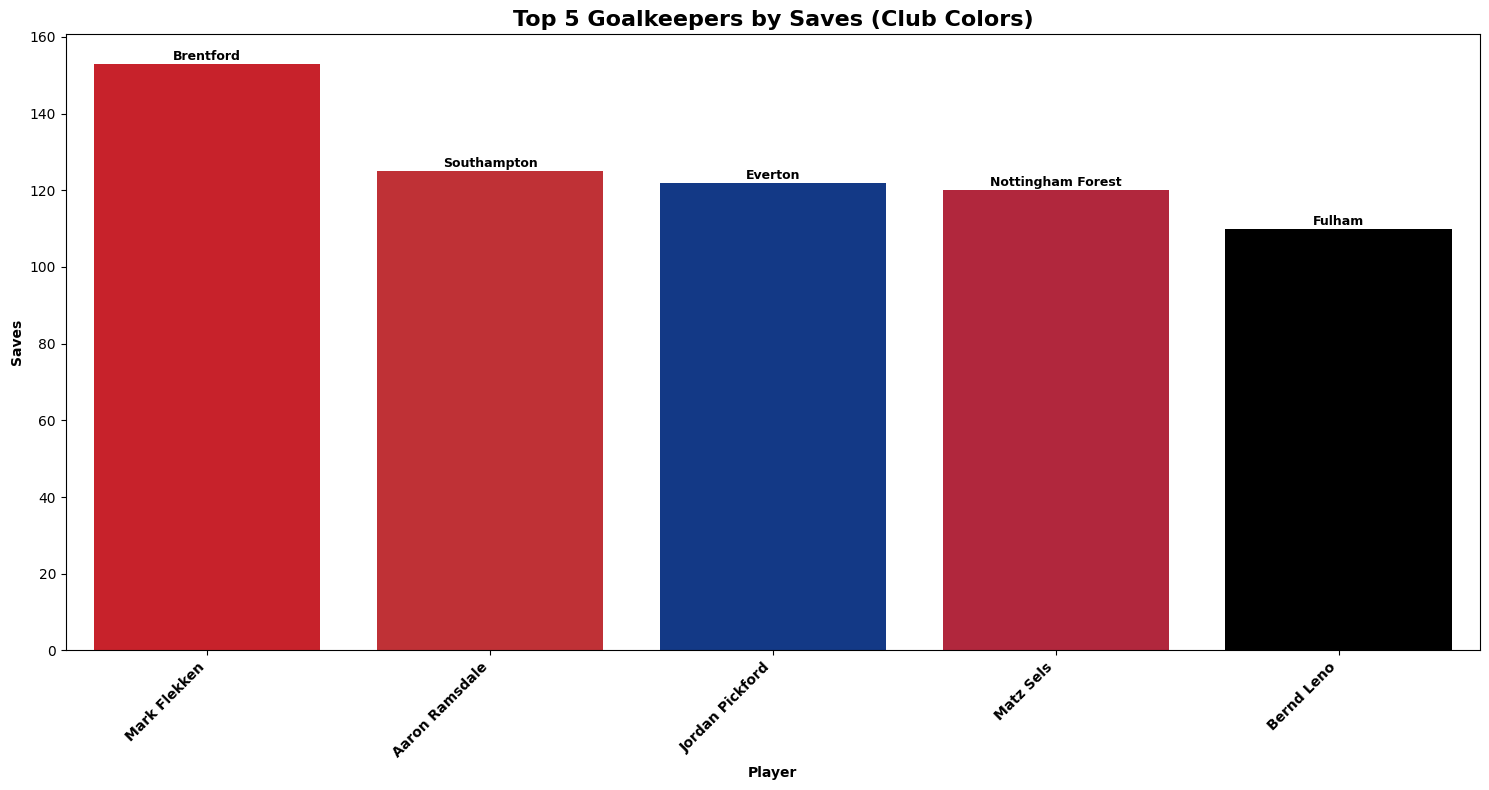

In [87]:
plt.figure(figsize=(15,8))

sns.barplot(
    data=top_5gkp_saves.reset_index(),
    x='Player Name',
    y='Saves',
    hue='Player Name',
    palette=gkp_saves_colors
)

clubs = [
    'Brentford','Southampton','Everton',
    'Nottingham Forest','Fulham'
]

ax = plt.gca()
for i, club in enumerate(clubs):
    ax.text(
        i,
        top_5gkp_saves.iloc[i] + 1,
        club,
        ha="center",
        fontsize=9,
        fontweight="bold"
    )


plt.title(
    "Top 5 Goalkeepers by Saves (Club Colors)",
    fontsize=16,
    fontweight="bold"
)

plt.xlabel("Player", fontweight="bold")
plt.ylabel("Saves", fontweight="bold")

plt.xticks(rotation=45, ha="right", fontweight="bold")

plt.tight_layout()
plt.show()

##Who are the top 5 goalkeepers in saving penalty kicks?

In [88]:
top_5gkp_saves_penalty = df.groupby('Player Name')['Penalties Saved'].sum().sort_values(ascending=False).head(5)
top_5gkp_saves_penalty

,Penalties Saved
Player Name,
José Sá,2
Aaron Ramsdale,2
Jordan Pickford,2
Robert Sánchez,1
Mads Hermansen,1


In [89]:
gkp_savepenalte_colors = {
    "José Sá": "#FDB913",             # Wolves
    "Aaron Ramsdale": "#D71920",      # Southampton
    "Jordan Pickford": "#003399",     # Everton
    "Robert Sánchez": "#034694",      # Chelsea
    "Mads Hermansen": "#03045e",      # Leicester City
}

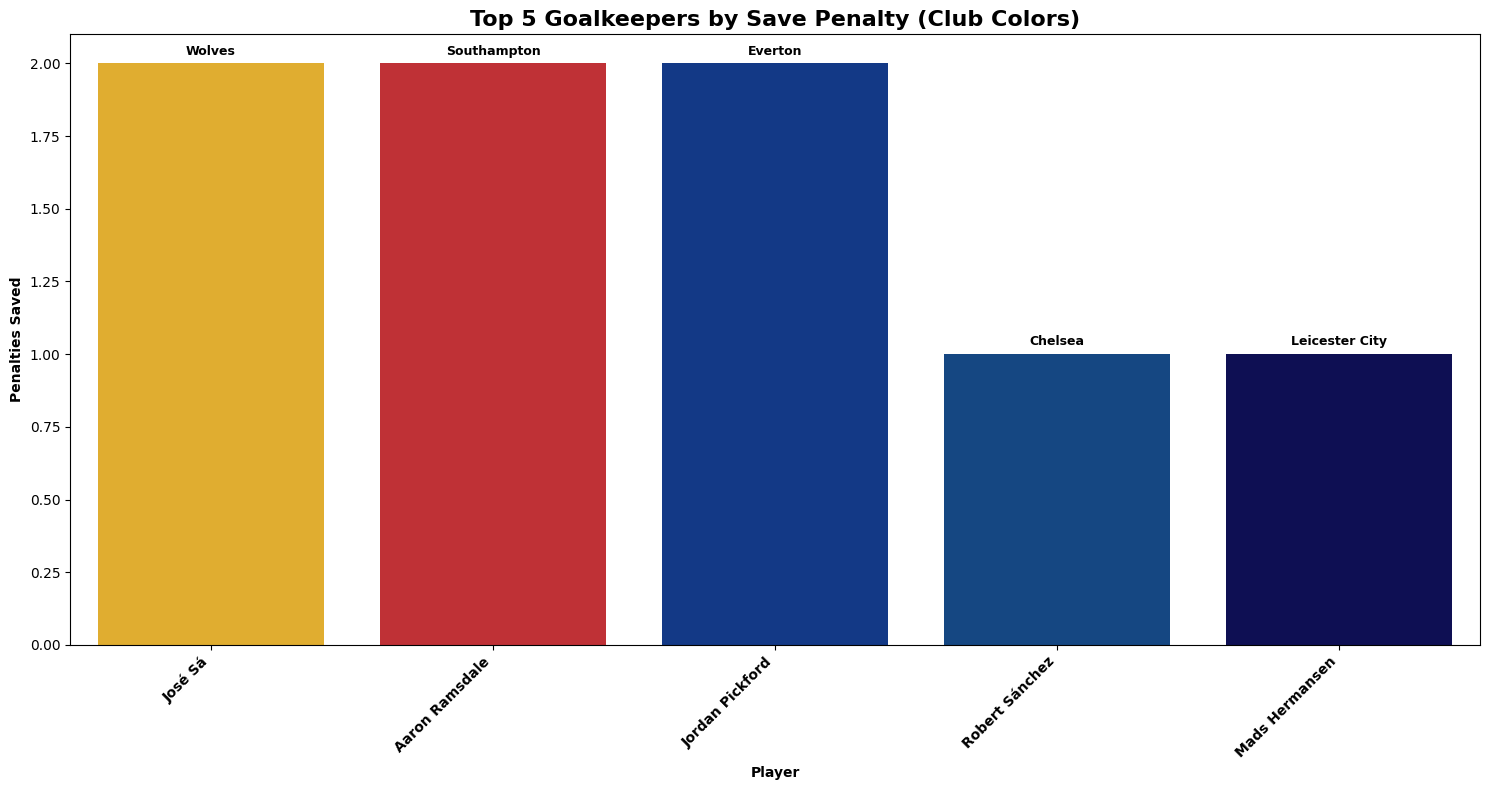

In [90]:
plt.figure(figsize=(15,8))

sns.barplot(
    data=top_5gkp_saves_penalty.reset_index(),
    x='Player Name',
    y='Penalties Saved',
    hue='Player Name',
    palette=gkp_savepenalte_colors
)

clubs = [
    'Wolves','Southampton','Everton',
    'Chelsea','Leicester City'
]

ax = plt.gca()
for i, club in enumerate(clubs):
    ax.text(
        i,
        top_5gkp_saves_penalty.iloc[i] + 0.03,
        club,
        ha="center",
        fontsize=9,
        fontweight="bold"
    )


plt.title(
    "Top 5 Goalkeepers by Save Penalty (Club Colors)",
    fontsize=16,
    fontweight="bold"
)

plt.xlabel("Player", fontweight="bold")
plt.ylabel("Penalties Saved", fontweight="bold")

plt.xticks(rotation=45, ha="right", fontweight="bold")

plt.tight_layout()
plt.show()

##Who are the top 5 goalkeepers with the most clean sheets?

In [91]:
gk_df = df[df['Position'] == 'GKP']

top_5gkp_cleansheet = gk_df.groupby('Player Name')['Clean Sheets'].sum().sort_values(ascending=False).head(5)
top_5gkp_cleansheet

,Clean Sheets
Player Name,
David Raya,13
Matz Sels,13
Jordan Pickford,12
Dean Henderson,11
Robert Sánchez,10


In [92]:
gkp_cleansheets_colors = {
    "David Raya": "#c1121f",          # Arsenal
    "Matz Sels": "#C8102E",           # Nottingham Forest
    "Jordan Pickford": "#003399",     # Everton
    "Dean Henderson": "#1B458F",      # Crystal Palace
    "Robert Sánchez": "#034694",      # Chelsea
}

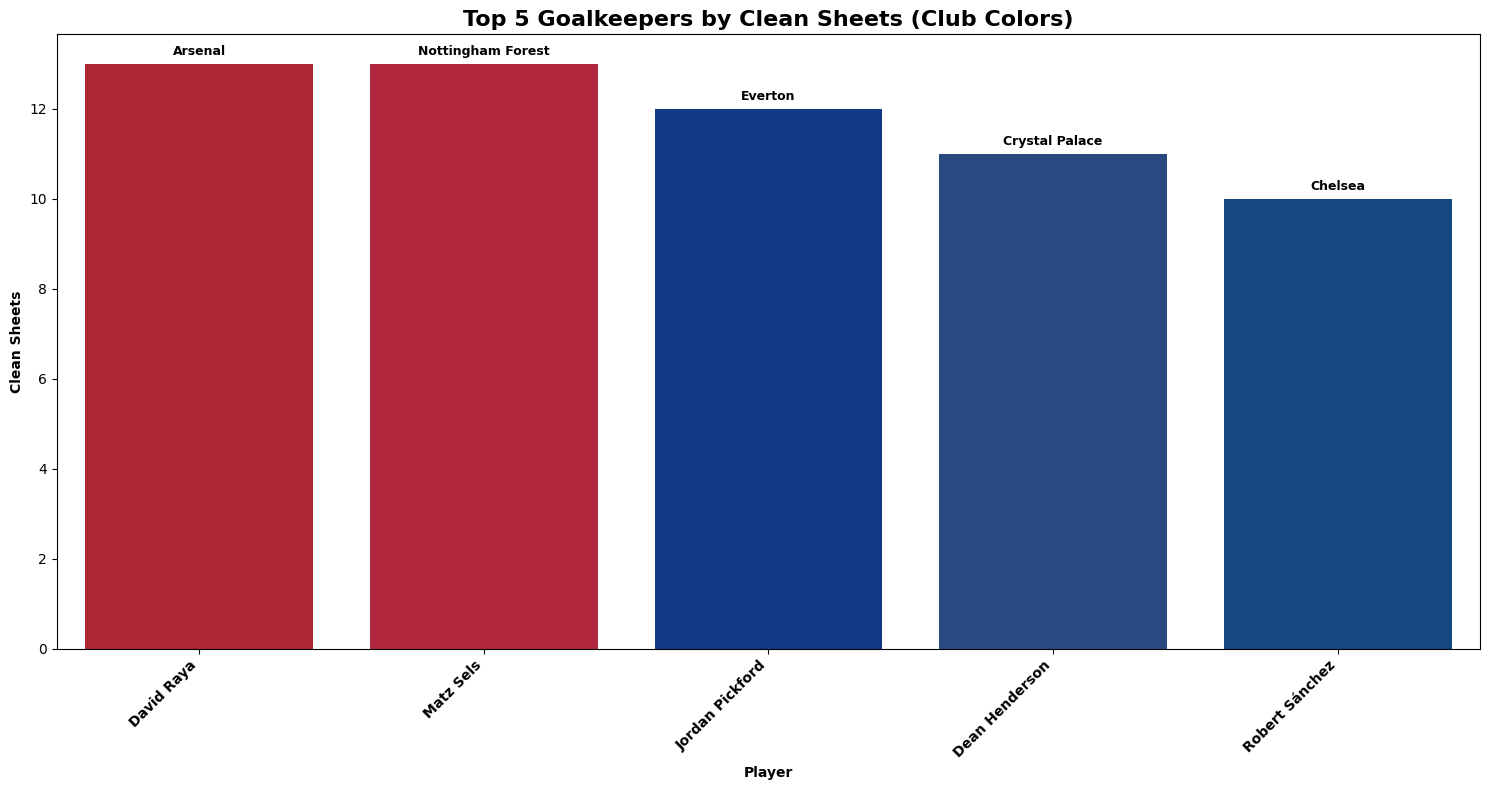

In [93]:
plt.figure(figsize=(15,8))

sns.barplot(
    data=top_5gkp_cleansheet.reset_index(),
    x='Player Name',
    y='Clean Sheets',
    hue='Player Name',
    palette=gkp_cleansheets_colors
)

clubs = [
    'Arsenal','Nottingham Forest','Everton',
    'Crystal Palace','Chelsea'
]

ax = plt.gca()
for i, club in enumerate(clubs):
    ax.text(
        i,
        top_5gkp_cleansheet.iloc[i] + 0.2,
        club,
        ha="center",
        fontsize=9,
        fontweight="bold"
    )


plt.title(
    "Top 5 Goalkeepers by Clean Sheets (Club Colors)",
    fontsize=16,
    fontweight="bold"
)

plt.xlabel("Player", fontweight="bold")
plt.ylabel("Clean Sheets", fontweight="bold")

plt.xticks(rotation=45, ha="right", fontweight="bold")

plt.tight_layout()
plt.show()